# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Andreas Bimoseno Kuma
- **Email:** kuma24@student.ub.ac.id
- **ID Dicoding:** dreinma

## Menentukan Pertanyaan Bisnis

### **1. Bagaimana pengaruh kondisi cuaca terhadap pola peminjaman sepeda?**
### **2. Bagaimana pola peminjaman sepeda dipengaruhi musim serta waktu peminjaman ?**

## Import Semua Packages/Library yang Digunakan

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.style.use('ggplot')
sns.set_palette("colorblind")

## Data Wrangling

### Gathering Data

In [29]:
# Membaca data Day
day_df = pd.read_csv("data/data_1.csv", parse_dates=["dteday"])
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [30]:
#Membaca data hour
hour_df = pd.read_csv("data/data_2.csv", parse_dates=["dteday"])
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [31]:
print(f"Dimensi Day: {day_df.shape} ")
print(f"Dimensi hour: {hour_df.shape} ")

Dimensi Day: (731, 16) 
Dimensi hour: (17379, 17) 


**Insight:**
- Dataset berisi 2 file day & hour
- terdapat 15 kolom dari kedua file data

### Assessing Data

In [32]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [33]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [34]:
# Cek missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [35]:
# Cek missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [36]:
# Hasil cek missing value
print("Duplikasi data per hari: ", day_df.duplicated().sum(), "\n")
print("Duplikasi data per jam : ", hour_df.duplicated().sum())

Duplikasi data per hari:  0 

Duplikasi data per jam :  0


In [37]:
# Deskripsi day
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [38]:
# Deskripsi hour
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


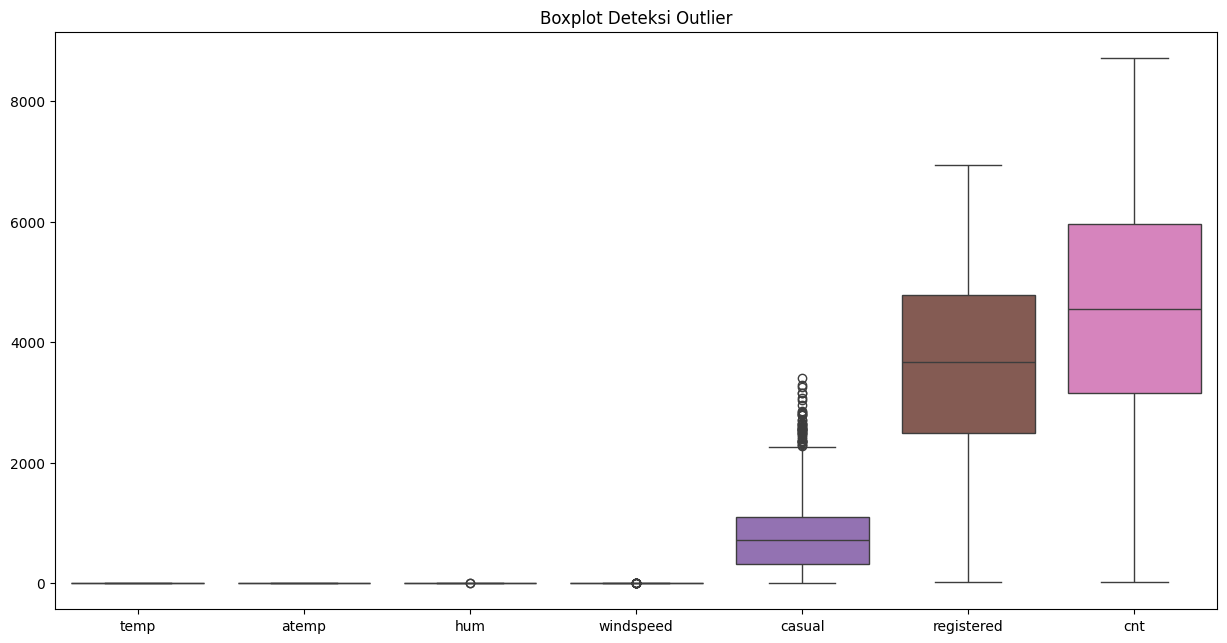

In [39]:
#cek outlier data day
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(15,7.5))
sns.boxplot(data=day_df[num_cols])
plt.title("Boxplot Deteksi Outlier")
plt.show()

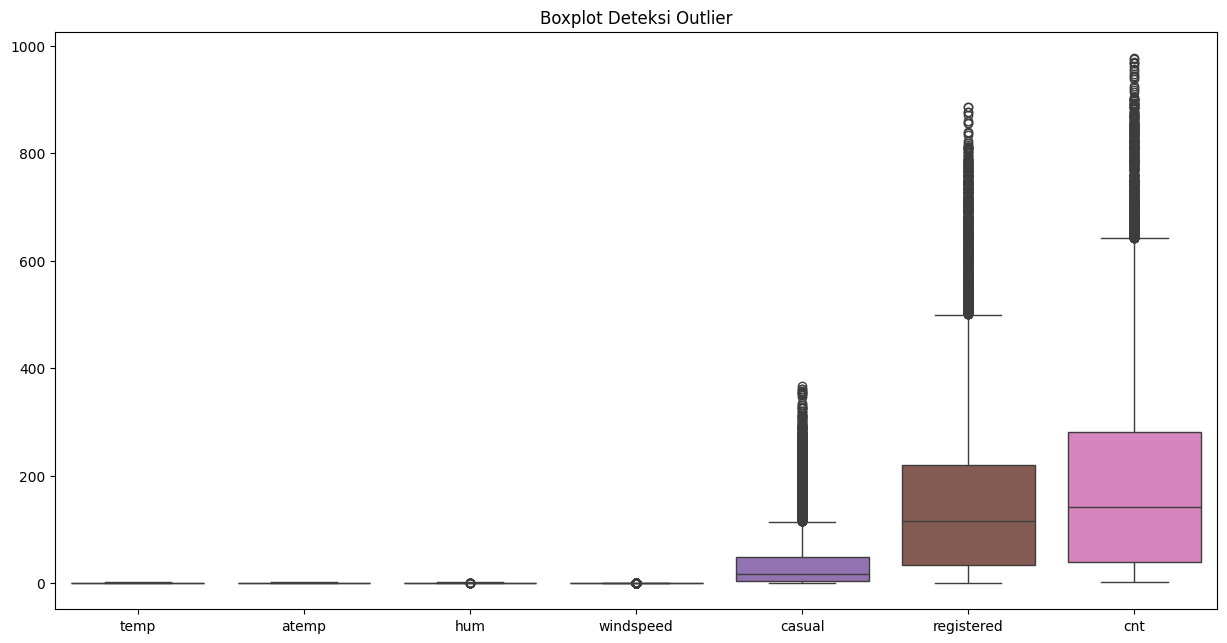

In [40]:
#cek outlier data hour
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(15,7.5))
sns.boxplot(data=hour_df[num_cols])
plt.title("Boxplot Deteksi Outlier")
plt.show()

In [41]:
Q1_hour   = hour_df[num_cols].quantile(0.25)
Q3_hour   = hour_df[num_cols].quantile(0.75)
IQR_hour  = Q3_hour - Q1_hour
outlier_condition_hour = ((hour_df[num_cols] < (Q1_hour - 1.5 * IQR_hour)) | (hour_df[num_cols] > (Q3_hour + 1.5 * IQR_hour))).sum()
print("\nJumlah Outlier per Kolom:\n", outlier_condition_hour)


Jumlah Outlier per Kolom:
 temp             0
atemp            0
hum             22
windspeed      342
casual        1192
registered     680
cnt            505
dtype: int64


**Insight:**
- data tidak ada duplikat
- tidak ada missing value dalam data  
- pada file day_df memiliki 3 kolom yang memiliki outlier
- pada file hour_df memiliki 5 kolom yang memiliki outlier
- kolom casual menjadi kolom dengan outlier terbanyak

### Cleaning Data

In [47]:
# Definisi kolom untuk analisis
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [48]:
# cek duplikasi data

print("Jumlah duplikasi: ", day_df.duplicated().sum(), "\n")
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

#tidak ada duplikasi maka tak perlu hapus duplikasi data

Jumlah duplikasi:  0 

Jumlah duplikasi:  0


In [49]:
# cek inaccurate value
for col in num_cols:
  print(f"nilai maksimum kolom {col}:")
  print(hour_df[hour_df[col] == hour_df[col].max()][['instant', 'dteday', col]], "\n\n")


nilai maksimum kolom temp:
       instant     dteday  temp
13163    13164 2012-07-07   1.0 


nilai maksimum kolom atemp:
      instant     dteday  atemp
4768     4769 2011-07-22    1.0 


nilai maksimum kolom hum:
       instant     dteday  hum
26          27 2011-01-02  1.0
721        722 2011-02-02  1.0
786        787 2011-02-05  1.0
787        788 2011-02-05  1.0
789        790 2011-02-05  1.0
...        ...        ...  ...
16865    16866 2012-12-10  1.0
16866    16867 2012-12-10  1.0
17025    17026 2012-12-17  1.0
17319    17320 2012-12-29  1.0
17320    17321 2012-12-29  1.0

[270 rows x 3 columns] 


nilai maksimum kolom windspeed:
      instant     dteday  windspeed
4315     4316 2011-07-03     0.8507
4316     4317 2011-07-03     0.8507 


nilai maksimum kolom casual:
       instant     dteday  casual
10477    10478 2012-03-17     367 


nilai maksimum kolom registered:
       instant     dteday  registered
14773    14774 2012-09-12         886 


nilai maksimum kolom cnt:
     

In [58]:
# # Buat kolom tambahan untuk analisis temporal
# day_df['year'] = day_df['dteday'].dt.year
# day_df['month_name'] = day_df['dteday'].dt.month_name()
# day_df['day_name'] = day_df['dteday'].dt.day_name()

# hour_df['year'] = hour_df['dteday'].dt.year
# hour_df['month_name'] = hour_df['dteday'].dt.month_name()
# hour_df['day_name'] = hour_df['dteday'].dt.day_name()


In [60]:
# Mapping untuk kolom season
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
day_df['season_name'] = day_df['season'].map(season_mapping)
hour_df['season_name'] = hour_df['season'].map(season_mapping)

# Mapping untuk kolom weathersit
weather_mapping = {1: 'Clear', 2: 'Cloudy/Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
day_df['weather_condition'] = day_df['weathersit'].map(weather_mapping)
hour_df['weather_condition'] = hour_df['weathersit'].map(weather_mapping)

# Mapping untuk workingday dan holiday
day_df['is_workingday'] = day_df['workingday'].map({0: 'No', 1: 'Yes'})
day_df['is_holiday'] = day_df['holiday'].map({0: 'No', 1: 'Yes'})

hour_df['is_workingday'] = hour_df['workingday'].map({0: 'No', 1: 'Yes'})
hour_df['is_holiday'] = hour_df['holiday'].map({0: 'No', 1: 'Yes'})

# Mapping weekday
weekday_mapping = { 0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
day_df['wekday_name'] = day_df['weekday'].map(weekday_mapping)
hour_df['wekday_name'] = hour_df['weekday'].map(weekday_mapping)

# Mapping untuk jam tertentu dalam satu hari
def categorize_time(hour):
    if 6 <= hour <= 9:
        return 'Morning Peak'
    elif 10 <= hour <= 15:
        return 'Day Time'
    elif 16 <= hour <= 19:
        return 'Evening Peak'
    else:
        return 'Night Time'

hour_df['time_category'] = hour_df['hr'].apply(categorize_time)

In [52]:
# Fungsi untuk deteksi dan imputasi outlier

def handle_outliers(df, num_cols):
    # Deteksi outlier sebelum imputasi
    Q1 = df[num_cols].quantile(0.25)
    Q3 = df[num_cols].quantile(0.75)
    IQR = Q3 - Q1
    outlier_before = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
    
    print(f"\nJumlah Outlier Sebelum Imputasi:\n{outlier_before}")
    
    # Visualisasi sebelum imputasi
    plt.figure(figsize=(15, 7.5))
    sns.boxplot(data=df[num_cols])
    plt.title("Boxplot Sebelum Imputasi Outlier")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Imputasi outlier
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        max = float(Q3 + (1.5 * IQR))
        min = float(Q1 - (1.5 * IQR))
        
        df.loc[df[col] > max, col] = max
        df.loc[df[col] < min, col] = min
    
    # Deteksi outlier setelah imputasi
    Q1 = df[num_cols].quantile(0.25)
    Q3 = df[num_cols].quantile(0.75)
    IQR = Q3 - Q1
    outlier_after = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
    
    print(f"\nJumlah Outlier Setelah Imputasi:\n{outlier_after}")
    
    # Visualisasi setelah imputasi
    plt.figure(figsize=(15, 7.5))
    sns.boxplot(data=df[num_cols])
    plt.title("Boxplot Setelah Imputasi Outlier")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return df


In [44]:
#cek outlier dalam data day
Q1   = day_df[num_cols].quantile(0.25)
Q3   = day_df[num_cols].quantile(0.75)
IQR  = Q3 - Q1
outlier_condition = ((day_df[num_cols] < (Q1- 1.5 * IQR)) | (day_df[num_cols] > (Q3 + 1.5 * IQR))).sum()
print("\nJumlah Outlier per Kolom:\n", outlier_condition)


Jumlah Outlier per Kolom:
 temp           0
atemp          0
hum            2
windspeed     13
casual        44
registered     0
cnt            0
dtype: int64


In [50]:
# cek outlier data hour
Q1   = hour_df[num_cols].quantile(0.25)
Q3   = hour_df[num_cols].quantile(0.75)
IQR  = Q3 - Q1
outlier_condition = ((hour_df[num_cols] < (Q1- 1.5 * IQR)) | (hour_df[num_cols] > (Q3 + 1.5 * IQR))).sum()
print("\nJumlah Outlier per Kolom:\n", outlier_condition)


Jumlah Outlier per Kolom:
 temp             0
atemp            0
hum             22
windspeed      342
casual        1192
registered     680
cnt            505
dtype: int64


In [51]:
# Definisi kolom untuk handling outlier
day_num_cols = ['hum', 'windspeed', 'casual']
hour_num_cols = ['hum', 'windspeed', 'casual', 'registered', 'cnt']

Penanganan Outlier untuk Dataset Harian (day_df)

Jumlah Outlier Sebelum Imputasi:
hum           2
windspeed    13
casual       44
dtype: int64


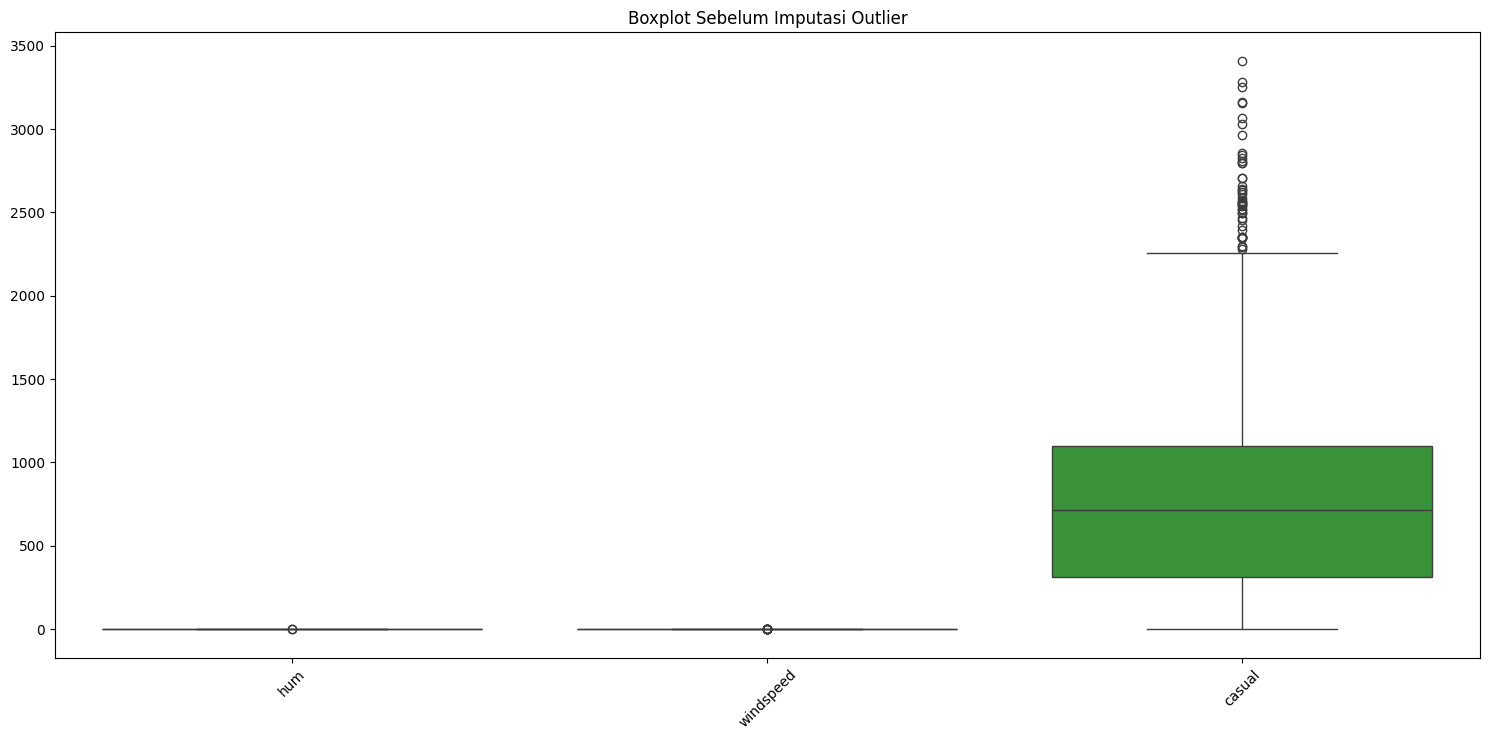


Jumlah Outlier Setelah Imputasi:
hum          0
windspeed    0
casual       0
dtype: int64


C:\Users\Kuma\AppData\Local\Temp\ipykernel_359148\667234691.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2266.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] > max, col] = max


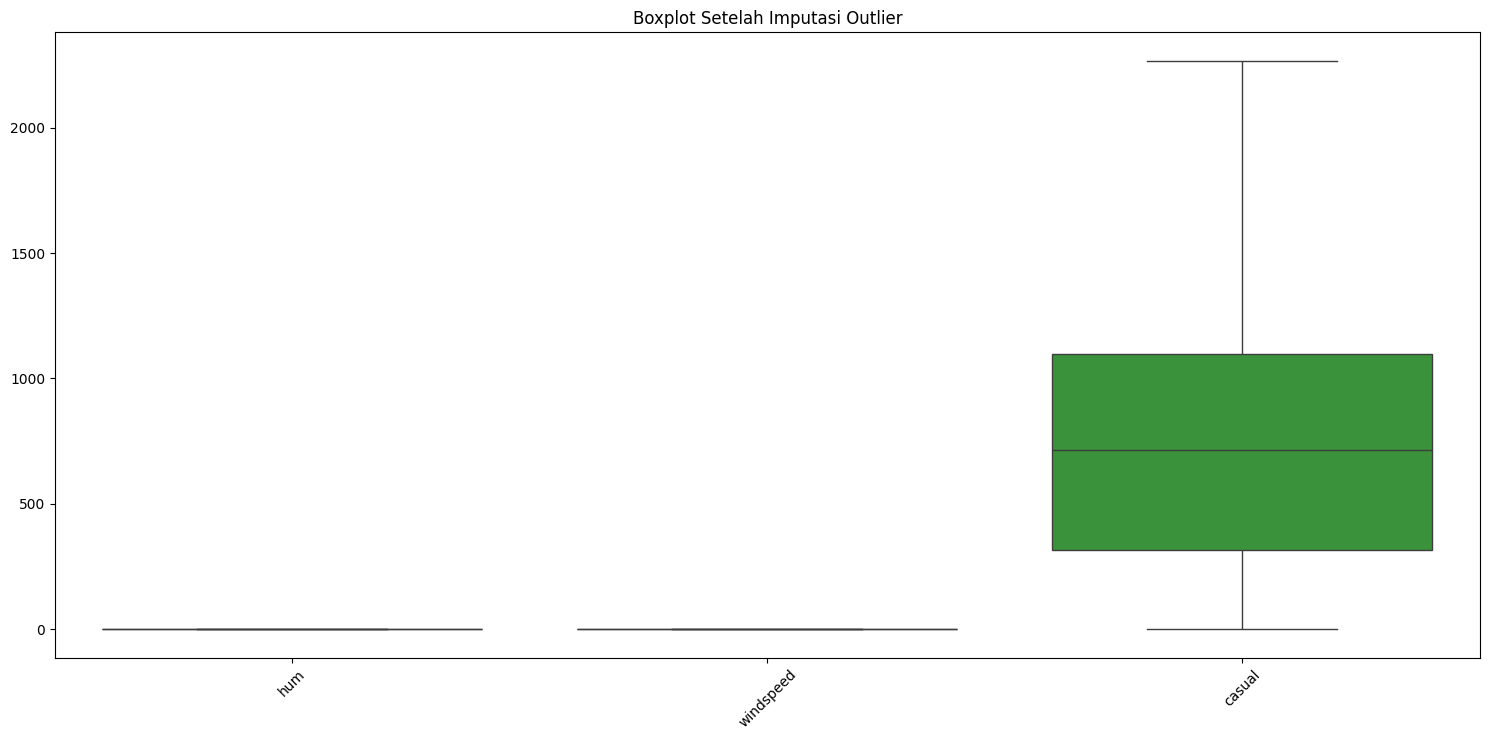

In [53]:
# Penanganan outlier day
print("Penanganan Outlier untuk Dataset Harian (day_df)")
day_df = handle_outliers(day_df, day_num_cols)


Penanganan Outlier untuk Dataset Per Jam (hour_df)

Jumlah Outlier Sebelum Imputasi:
hum             22
windspeed      342
casual        1192
registered     680
cnt            505
dtype: int64


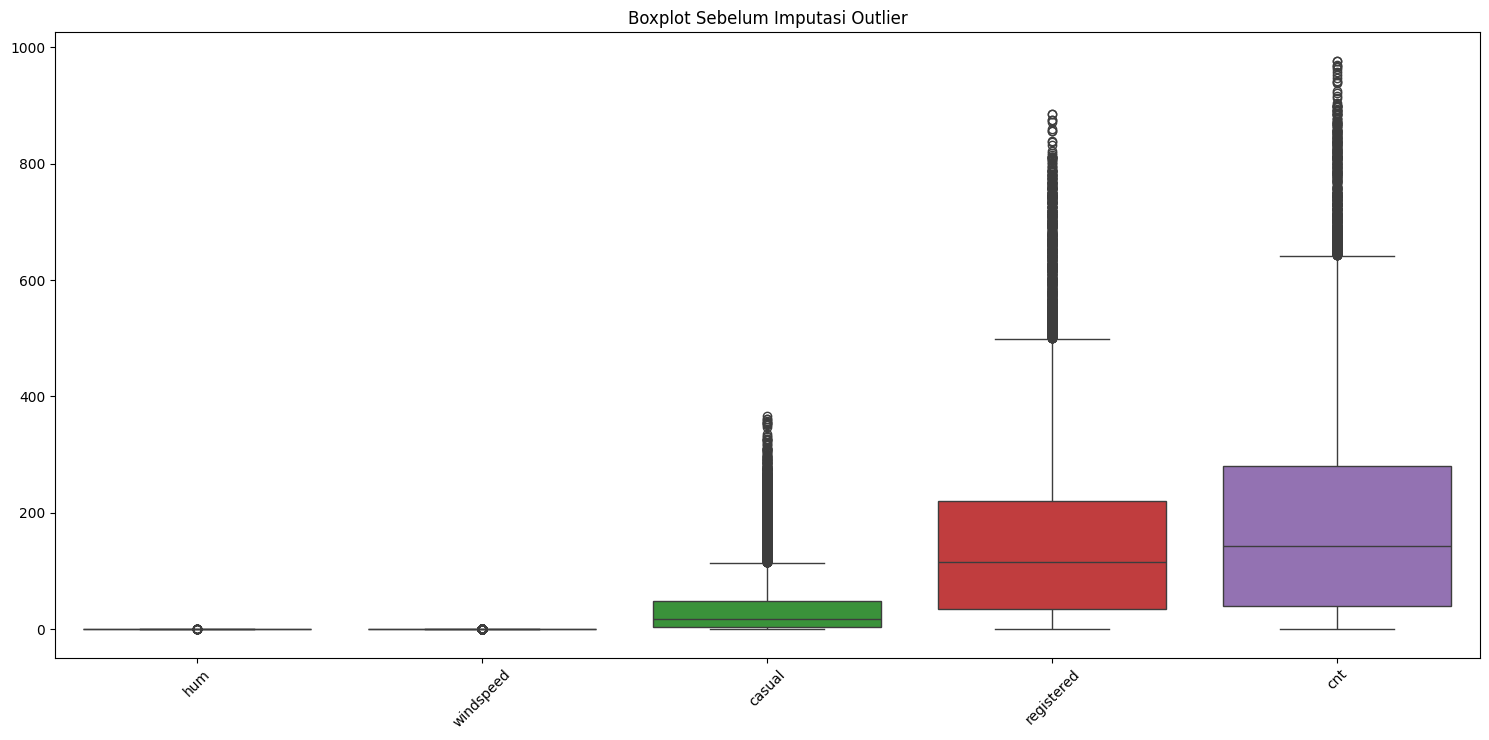

C:\Users\Kuma\AppData\Local\Temp\ipykernel_359148\667234691.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '642.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] > max, col] = max



Jumlah Outlier Setelah Imputasi:
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


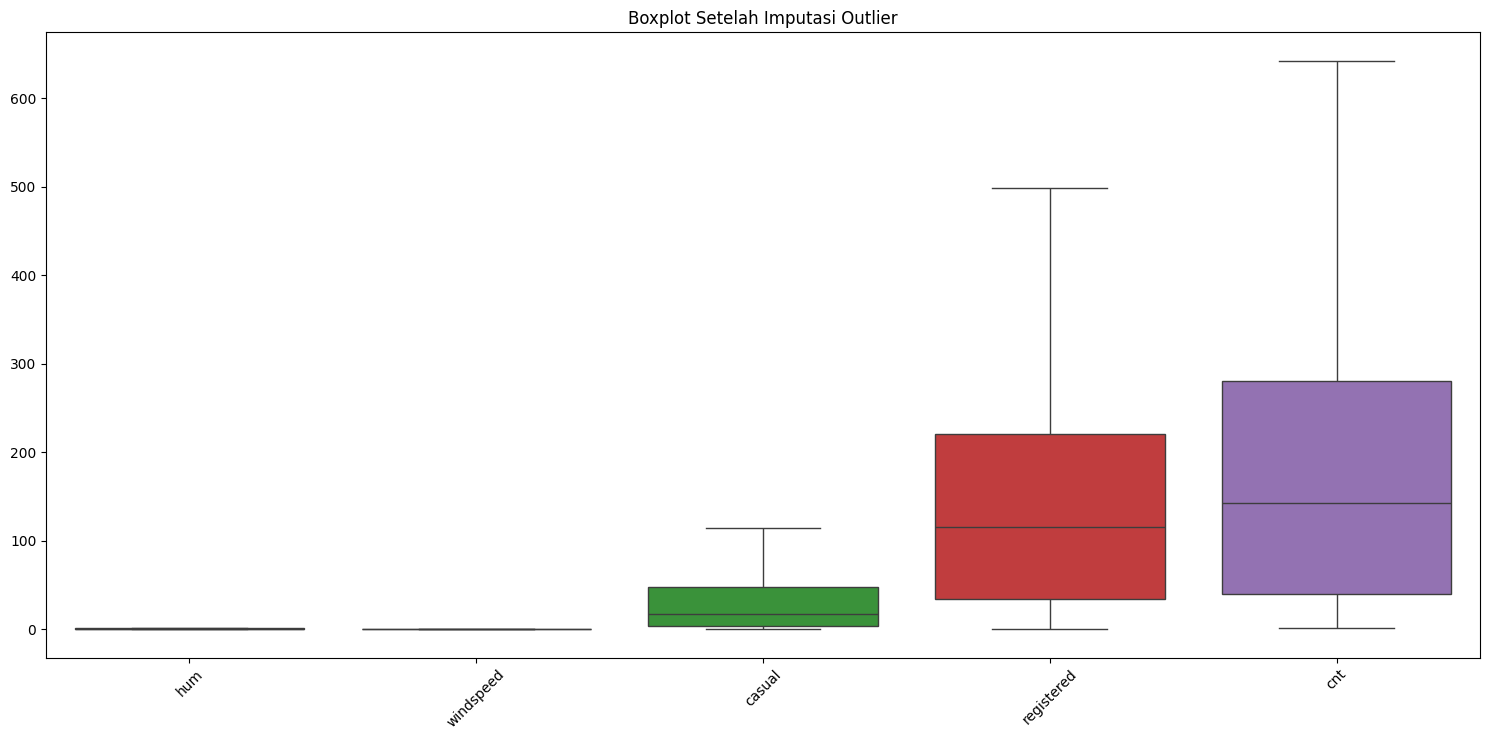

In [54]:
# Penanganan outlier hour
print("\nPenanganan Outlier untuk Dataset Per Jam (hour_df)")
hour_df = handle_outliers(hour_df, hour_num_cols)

In [57]:
# Cek nilai ekstrem setelah imputasi untuk memastikan data sudah bersih
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'registered', 'casual', 'cnt']

print("\nNilai min-max day_df setelah cleaning:")
for col in numerical_cols:
    print(f"{col}: Min = {day_df[col].min()}, Max = {day_df[col].max()}")

print("\nNilai min-max hour_df setelah cleaning:")
for col in numerical_cols:
    print(f"{col}: Min = {hour_df[col].min()}, Max = {hour_df[col].max()}")


Nilai min-max day_df setelah cleaning:
temp: Min = 0.0591304, Max = 0.861667
atemp: Min = 0.0790696, Max = 0.840896
hum: Min = 0.20468725, Max = 0.9725
windspeed: Min = 0.0223917, Max = 0.38061125
registered: Min = 20, Max = 6946
casual: Min = 2.0, Max = 2266.75
cnt: Min = 22, Max = 8714

Nilai min-max hour_df setelah cleaning:
temp: Min = 0.02, Max = 1.0
atemp: Min = 0.0, Max = 1.0
hum: Min = 0.029999999999999916, Max = 1.0
windspeed: Min = 0.0, Max = 0.4775
registered: Min = 0, Max = 499
casual: Min = 0, Max = 114
cnt: Min = 1.0, Max = 642.5


In [ ]:
# # Merge dataset day dengan hour

# # Pilih kolom dari day_df yang ingin disertakan
# day_cols_to_include = ['dteday', 'season', 'season_name', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'weather_condition']
# day_df_subset = day_df[day_cols_to_include]

# # Gabungkan ke hour_df
# main_data_hourly = pd.merge(hour_df, day_df_subset, on=['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'], how='left')

# # Simpan dataset gabungan
# main_data.to_csv('main_data.csv', index=False)
# main_data_hourly.to_csv('main_data_hourly.csv', index=False)

# print("\nData telah digabungkan dan disimpan sebagai main_data.csv dan main_data_hourly.csv")


In [71]:
# Merge dataset day dengan hour

# Perbedaan hari
print("\nMemeriksa perbedaan jumlah hari day_df dan hour_df")
days_in_day_df = set(day_df['dteday'])
days_in_hour_df = set(hour_df['dteday'])

days_only_in_day = days_in_day_df - days_in_hour_df
days_only_in_hour = days_in_hour_df - days_in_day_df

print(f"Hari yang hanya ada di day_df: {len(days_only_in_day)}")
print(f"Hari yang hanya ada di hour_df: {len(days_only_in_hour)}\n")

merged_df = hour_df.copy()

# Jumlah tanggal sebelum merge
print(f"Jumlah baris sebelum merge: {len(merged_df)}")
print(f"Jumlah hari unik sebelum merge: {merged_df['dteday'].nunique()}")
print(f"Range tanggal sebelum merge: '{merged_df['dteday'].min()}' hingga '{merged_df['dteday'].max()}' ")



day_specific_cols = [col for col in day_df.columns if col not in hour_df.columns]
if day_specific_cols:
    day_temp = day_df[['dteday'] + day_specific_cols]
    merged_df = pd.merge(merged_df, day_temp, on='dteday', how='left')

merged_df.to_csv('data/main_data.csv', index=False)

print("\nData berhasil digabungkan dan disimpan sebagai main_data.csv")



Memeriksa perbedaan jumlah hari day_df dan hour_df
Hari yang hanya ada di day_df: 0
Hari yang hanya ada di hour_df: 0

Jumlah baris sebelum merge: 17379
Jumlah hari unik sebelum merge: 731
Range tanggal sebelum merge: '2011-01-01 00:00:00' hingga '2012-12-31 00:00:00' 

Data berhasil digabungkan dan disimpan sebagai main_data.csv


**Insight:**
- data cenderung bersih dan hanya memiliki outlier
- beberapa outlier telah dibersihkan dengan imputasi
- dua dataframe digabungkan menjadi satu dalam main_data.csv

## Exploratory Data Analysis (EDA)

### Explore Distribusi data

In [73]:
main_data = pd.read_csv('data/main_data.csv')

main_data['dteday'] = pd.to_datetime(main_data['dteday'])

print("Informasi Dataset:")
print(f"Jumlah baris dan kolom: {main_data.shape}")
print("\nTipe data setiap kolom:")
print(main_data.dtypes)
print("\nLima baris pertama:")
print(main_data.head())

Informasi Dataset:
Jumlah baris dan kolom: (17379, 26)

Tipe data setiap kolom:
instant                       int64
dteday               datetime64[ns]
season                        int64
yr                            int64
mnth                          int64
hr                            int64
holiday                       int64
weekday                       int64
workingday                    int64
weathersit                    int64
temp                        float64
atemp                       float64
hum                         float64
windspeed                   float64
casual                        int64
registered                    int64
cnt                         float64
year                          int64
month_name                   object
day_name                     object
season_name                  object
weather_condition            object
is_workingday                object
is_holiday                   object
time_category                object
wekday_name         

In [74]:
# Statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif:")
print(main_data.describe())

# Statistik untuk kolom kategorikal
print("\nDistribusi Nilai Kategorikal:")
categorical_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols:
    print(f"\nDistribusi {col}:")
    print(main_data[col].value_counts(normalize=True).sort_index() * 100)



Statistik Deskriptif:
          instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000

### Analisis Faktor Cuaca

In [77]:
weather_factors = ['temp', 'atemp', 'hum', 'windspeed']

# Analisis korelasi faktor cuaca dengan peminjaman
weather_corr = main_data[weather_factors + ['cnt']].corr()
print("\nKorelasi Antar Faktor Cuaca dan Jumlah Peminjaman:")
print(weather_corr)

# Korelasi faktor cuaca dengan jumlah peminjaman
weather_cnt_corr = weather_corr['cnt'].drop('cnt').sort_values(ascending=False)
print("\nKorelasi Faktor Cuaca dengan Jumlah Peminjaman (Diurutkan):")
print(weather_cnt_corr)



Korelasi Antar Faktor Cuaca dan Jumlah Peminjaman:
               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.987672 -0.070035  -0.020202  0.411133
atemp      0.987672  1.000000 -0.052053  -0.059597  0.407517
hum       -0.070035 -0.052053  1.000000  -0.290708 -0.329926
windspeed -0.020202 -0.059597 -0.290708   1.000000  0.100906
cnt        0.411133  0.407517 -0.329926   0.100906  1.000000

Korelasi Faktor Cuaca dengan Jumlah Peminjaman (Diurutkan):
temp         0.411133
atemp        0.407517
windspeed    0.100906
hum         -0.329926
Name: cnt, dtype: float64


In [78]:
# Analisis suhu berdasarkan range

main_data['temp_bin'] = pd.cut(main_data['temp'], bins=5)
temp_bin_stats = main_data.groupby('temp_bin')['cnt'].agg(['count', 'min', 'max', 'mean', 'median', 'std']).reset_index()
print("\nStatistik Peminjaman Berdasarkan Range Suhu:")
print(temp_bin_stats)


Statistik Peminjaman Berdasarkan Range Suhu:
         temp_bin  count   min    max        mean  median         std
0  (0.019, 0.216]   1070   1.0  642.5   65.035047    41.0   81.057065
1  (0.216, 0.412]   5357   1.0  642.5  122.813795    86.0  126.389776
2  (0.412, 0.608]   5117   1.0  642.5  191.796560   154.0  171.327761
3  (0.608, 0.804]   5126   1.0  642.5  254.063110   225.0  187.864041
4    (0.804, 1.0]    709  48.0  642.5  320.905501   295.0  151.291886


C:\Users\Kuma\AppData\Local\Temp\ipykernel_359148\1215015402.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_bin_stats = main_data.groupby('temp_bin')['cnt'].agg(['count', 'min', 'max', 'mean', 'median', 'std']).reset_index()


In [79]:
# Analisis kelembaban berdasarkan range
main_data['hum_bin'] = pd.cut(main_data['hum'], bins=5)
hum_bin_stats = main_data.groupby('hum_bin')['cnt'].agg(['count', 'min', 'max', 'mean', 'median', 'std']).reset_index()
print("\nStatistik Peminjaman Berdasarkan Range Kelembaban:")
print(hum_bin_stats)


Statistik Peminjaman Berdasarkan Range Kelembaban:
          hum_bin  count  min    max        mean  median         std
0  (0.029, 0.224]    148  1.0  642.5  248.152027   198.0  203.179034
1  (0.224, 0.418]   2621  1.0  642.5  276.480923   240.0  179.595113
2  (0.418, 0.612]   5547  1.0  642.5  215.000451   183.0  172.335620
3  (0.612, 0.806]   5095  1.0  642.5  169.053091   120.0  166.323047
4    (0.806, 1.0]   3968  1.0  642.5  106.718120    58.0  127.409146


C:\Users\Kuma\AppData\Local\Temp\ipykernel_359148\2341519966.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hum_bin_stats = main_data.groupby('hum_bin')['cnt'].agg(['count', 'min', 'max', 'mean', 'median', 'std']).reset_index()


In [80]:
# Analisis kecepatan angin berdasarkan range
main_data['windspeed_bin'] = pd.cut(main_data['windspeed'], bins=5)
wind_bin_stats = main_data.groupby('windspeed_bin')['cnt'].agg(['count', 'min', 'max', 'mean', 'median', 'std']).reset_index()
print("\nStatistik Peminjaman Berdasarkan Range Kecepatan Angin:")
print(wind_bin_stats)


Statistik Peminjaman Berdasarkan Range Kecepatan Angin:
         windspeed_bin  count  min    max        mean  median         std
0  (-0.000478, 0.0955]   3605  1.0  642.5  154.227878   104.0  160.170139
1      (0.0955, 0.191]   5050  1.0  642.5  177.085644   132.0  168.838175
2       (0.191, 0.286]   5513  1.0  642.5  205.688282   167.0  177.013408
3       (0.286, 0.382]   1870  1.0  642.5  204.815508   159.0  177.475741
4       (0.382, 0.478]   1341  1.0  642.5  202.486950   163.0  169.568777


C:\Users\Kuma\AppData\Local\Temp\ipykernel_359148\1453957343.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_bin_stats = main_data.groupby('windspeed_bin')['cnt'].agg(['count', 'min', 'max', 'mean', 'median', 'std']).reset_index()


### Analisis Tipe Hari

In [81]:
# Analisis peminjaman berdasarkan hari kerja (workingday)
workingday_stats = main_data.groupby('workingday')['cnt'].agg(['count', 'min', 'max', 'mean', 'median', 'std']).reset_index()
print("\nStatistik Peminjaman Berdasarkan Hari Kerja vs Hari Libur:")
print(workingday_stats)

# Analisis peminjaman berdasarkan hari dalam seminggu (weekday)
weekday_stats = main_data.groupby('weekday')['cnt'].agg(['count', 'min', 'max', 'mean', 'median', 'std']).reset_index()
print("\nStatistik Peminjaman Berdasarkan Hari dalam Seminggu:")
print(weekday_stats)

# Analisis peminjaman berdasarkan hari libur (holiday)
holiday_stats = main_data.groupby('holiday')['cnt'].agg(['count', 'min', 'max', 'mean', 'median', 'std']).reset_index()
print("\nStatistik Peminjaman Berdasarkan Hari Libur Nasional:")
print(holiday_stats)


Statistik Peminjaman Berdasarkan Hari Kerja vs Hari Libur:
   workingday  count  min    max        mean  median         std
0           0   5514  1.0  642.5  180.663674   119.0  170.710242
1           1  11865  1.0  642.5  189.009187   151.0  172.438725

Statistik Peminjaman Berdasarkan Hari dalam Seminggu:
   weekday  count  min    max        mean  median         std
0        0   2502  1.0  642.5  176.998801   116.0  166.766492
1        1   2479  1.0  642.5  180.376563   139.0  168.954964
2        2   2453  1.0  642.5  186.836119   147.0  174.655138
3        3   2475  1.0  642.5  186.066667   143.0  175.686267
4        4   2471  1.0  642.5  191.640024   154.0  173.773379
5        5   2487  1.0  642.5  193.568959   165.0  166.222308
6        6   2512  1.0  642.5  189.090963   129.0  176.753816

Statistik Peminjaman Berdasarkan Hari Libur Nasional:
   holiday  count  min    max        mean  median         std
0        0  16879  1.0  642.5  187.241039   144.0  172.304707
1        1    5

In [82]:
# Pola peminjaman per jam berdasarkan workingday
hourly_workingday = main_data.groupby(['workingday', 'hr'])['cnt'].mean().reset_index()
print("\nRata-rata Peminjaman Per Jam Berdasarkan Hari Kerja vs Hari Libur:")
for day_type in [0, 1]:
    day_label = "Hari Kerja" if day_type == 1 else "Hari Libur"
    print(f"\n{day_label}:")
    subset = hourly_workingday[hourly_workingday['workingday'] == day_type]
    for _, row in subset.iterrows():
        print(f"Jam {int(row['hr'])}: {row['cnt']:.2f}")


Rata-rata Peminjaman Per Jam Berdasarkan Hari Kerja vs Hari Libur:

Hari Libur:
Jam 0: 90.80
Jam 1: 69.51
Jam 2: 53.17
Jam 3: 25.78
Jam 4: 8.26
Jam 5: 8.69
Jam 6: 18.74
Jam 7: 43.41
Jam 8: 105.65
Jam 9: 171.62
Jam 10: 255.91
Jam 11: 315.21
Jam 12: 362.62
Jam 13: 368.35
Jam 14: 362.00
Jam 15: 356.11
Jam 16: 350.52
Jam 17: 321.68
Jam 18: 280.90
Jam 19: 231.67
Jam 20: 174.74
Jam 21: 142.06
Jam 22: 116.06
Jam 23: 85.93

Hari Kerja:
Jam 0: 36.79
Jam 1: 16.55
Jam 2: 8.68
Jam 3: 4.94
Jam 4: 5.43
Jam 5: 24.91
Jam 6: 102.50
Jam 7: 290.61
Jam 8: 459.49
Jam 9: 241.52
Jam 10: 135.37
Jam 11: 158.23
Jam 12: 200.82
Jam 13: 198.43
Jam 14: 183.56
Jam 15: 201.33
Jam 16: 293.12
Jam 17: 478.87
Jam 18: 456.97
Jam 19: 347.60
Jam 20: 249.72
Jam 21: 186.29
Jam 22: 138.39
Jam 23: 88.71


In [86]:
# Tabel peminjaman berdasarkan jam dan hari dalam seminggu
hour_weekday_pivot = pd.pivot_table(main_data, values='cnt', index='hr', columns='weekday', aggfunc='mean')
print("\nPola Peminjaman Berdasarkan Jam dan Hari dalam Seminggu (Rata-rata):\n")
print(hour_weekday_pivot)

# Identifikasi jam sibuk untuk setiap hari
print("\n\nJam Sibuk untuk Setiap Hari dalam Seminggu:\n")
for day in range(7):
    day_data = hour_weekday_pivot[day]
    busiest_hour = day_data.idxmax()
    max_rentals = day_data.max()
    day_names = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
    print(f"{day_names[day]}: Jam {busiest_hour} dengan rata-rata {max_rentals:.2f} peminjaman")



Pola Peminjaman Berdasarkan Jam dan Hari dalam Seminggu (Rata-rata):

weekday           0           1           2           3           4  \
hr                                                                    
0         93.990385   34.009524   27.623762   34.557692   39.271845   
1         77.432692   17.307692   12.540000   15.336538   17.223301   
2         61.627451   10.313131    6.801980    7.813725    9.156863   
3         31.144231    5.113402    4.152174    4.888889    5.071429   
4          9.362745    5.785714    5.131313    4.968750    5.280000   
5          8.693878   21.653846   24.455446   25.750000   25.912621   
6         14.495146   85.865385  106.500000  107.807692  107.436893   
7         33.104762  248.538462  299.696078  303.980769  304.737864   
8         83.857143  402.144231  456.936275  463.658654  469.655340   
9        156.542857  218.442308  236.450980  238.528846  240.873786   
10       258.580952  139.028846  129.225490  131.894231  132.563107   
11    

In [91]:
# Analisis peminjaman berdasarkan musim
season_stats = main_data.groupby('season_name')['cnt'].agg(['count', 'min', 'max', 'mean', 'median', 'std']).reset_index()
print("\nStatistik Peminjaman Berdasarkan Musim:")
print(season_stats)

# Analisis casual vs registered berdasarkan musim
season_user_type = main_data.groupby('season_name')[['casual', 'registered', 'cnt']].mean().reset_index()
print("\nRata-rata Peminjaman Casual vs Registered Berdasarkan Musim:")
print(season_user_type)

# Proporsi casual vs registered berdasarkan musim
season_user_type['casual_pct'] = season_user_type['casual'] / season_user_type['cnt'] * 100
season_user_type['registered_pct'] = season_user_type['registered'] / season_user_type['cnt'] * 100
print("\nProporsi Casual vs Registered (%) Berdasarkan Musim:")
print(season_user_type[['season_name', 'casual_pct', 'registered_pct']])


Statistik Peminjaman Berdasarkan Musim:
  season_name  count  min    max        mean  median         std
0        Fall   4232  1.0  642.5  195.270794   155.5  172.128514
1      Spring   4409  1.0  642.5  205.489000   165.0  180.570115
2      Summer   4496  1.0  642.5  230.507340   199.0  183.251576
3      Winter   4242  1.0  642.5  110.802805    76.0  117.688827

Rata-rata Peminjaman Casual vs Registered Berdasarkan Musim:
  season_name     casual  registered         cnt
0        Fall  26.793715  162.077032  195.270794
1      Spring  38.750737  156.898843  205.489000
2      Summer  44.604760  177.451512  230.507340
3      Winter  13.371759   96.135314  110.802805

Proporsi Casual vs Registered (%) Berdasarkan Musim:
  season_name  casual_pct  registered_pct
0        Fall   13.721312       83.001164
1      Spring   18.857816       76.353889
2      Summer   19.350690       76.983020
3      Winter   12.068069       86.762527


In [93]:
# Analisis peminjaman berdasarkan bulan
monthly_stats = main_data.groupby('mnth')['cnt'].agg(['count', 'min', 'max', 'mean', 'median', 'std']).reset_index()
print("\nStatistik Peminjaman Berdasarkan Bulan (Angka):")
print(monthly_stats)

monthly_name_stats = main_data.groupby('month_name')['cnt'].agg(['count', 'min', 'max', 'mean', 'median', 'std']).reset_index()
# Urutkan bulan secara kronologis
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_name_stats['month_order'] = pd.Categorical(monthly_name_stats['month_name'], categories=month_order, ordered=True)
monthly_name_stats = monthly_name_stats.sort_values('month_order').drop('month_order', axis=1)
print("\nStatistik Peminjaman Berdasarkan Bulan (Nama):")
print(monthly_name_stats)

# Analisis casual vs registered berdasarkan bulan
monthly_user_type = main_data.groupby('mnth')[['casual', 'registered', 'cnt']].mean().reset_index()
print("\nRata-rata Peminjaman Casual vs Registered Berdasarkan Bulan (Angka):")
print(monthly_user_type)


Statistik Peminjaman Berdasarkan Bulan (Angka):
    mnth  count  min    max        mean  median         std
0      1   1429  1.0  559.0   94.424773    66.0   99.907146
1      2   1341  1.0  610.0  112.865026    82.0  112.486565
2      3   1473  1.0  642.5  153.613035   104.0  157.308546
3      4   1437  1.0  642.5  185.391093   136.0  175.833049
4      5   1488  1.0  642.5  219.940860   188.5  179.801720
5      6   1440  1.0  642.5  236.709375   203.0  186.476292
6      7   1488  1.0  642.5  227.646841   202.0  176.129896
7      8   1475  1.0  642.5  232.037966   204.0  184.787928
8      9   1437  1.0  642.5  232.386569   190.0  193.889778
9     10   1451  1.0  642.5  215.331496   174.0  185.239008
10    11   1437  1.0  642.5  176.814544   145.0  157.355810
11    12   1483  1.0  642.5  141.748820   106.0  138.942144

Statistik Peminjaman Berdasarkan Bulan (Nama):
   month_name  count  min    max        mean  median         std
4     January   1429  1.0  559.0   94.424773    66.0   99.

In [94]:
# Analisis peminjaman berdasarkan jam
hourly_stats = main_data.groupby('hr')['cnt'].agg(['count', 'min', 'max', 'mean', 'median', 'std']).reset_index()
print("\nStatistik Peminjaman Berdasarkan Jam:")
print(hourly_stats)

# Identifikasi jam dengan peminjaman tertinggi dan terendah
busiest_hour = hourly_stats.loc[hourly_stats['mean'].idxmax()]
least_busy_hour = hourly_stats.loc[hourly_stats['mean'].idxmin()]
print(f"\nJam tersibuk: {int(busiest_hour['hr'])} dengan rata-rata {busiest_hour['mean']:.2f} peminjaman")
print(f"Jam tersepi: {int(least_busy_hour['hr'])} dengan rata-rata {least_busy_hour['mean']:.2f} peminjaman")

# Analisis casual vs registered berdasarkan jam
hourly_user_type = main_data.groupby('hr')[['casual', 'registered', 'cnt']].mean().reset_index()
print("\nRata-rata Peminjaman Casual vs Registered Berdasarkan Jam:")
print(hourly_user_type)


Statistik Peminjaman Berdasarkan Jam:
    hr  count   min    max        mean  median         std
0    0    726   2.0  283.0   53.898072    40.0   42.307910
1    1    724   1.0  168.0   33.375691    20.0   33.538727
2    2    715   1.0  132.0   22.869930    11.0   26.578642
3    3    697   1.0   79.0   11.727403     6.0   13.239190
4    4    697   1.0   28.0    6.352941     6.0    4.143818
5    5    717   1.0   66.0   19.889819    19.0   13.200765
6    6    725   1.0  213.0   76.044138    76.0   55.084348
7    7    727   1.0  596.0  212.064649   208.0  161.441936
8    8    727   5.0  642.5  347.059835   385.0  217.102425
9    9    727  14.0  426.0  219.309491   216.0   93.703458
10  10    727   8.0  539.0  173.668501   147.0  102.205413
11  11    727  10.0  642.5  208.108666   180.0  127.375780
12  12    728   3.0  642.5  252.161401   229.0  141.639818
13  13    729  11.0  642.5  252.272291   224.0  144.106763
14  14    729  12.0  642.5  240.100823   212.0  144.717935
15  15    729   7

In [97]:
# Agregasi data per hari untuk analisis tren
daily_rentals = main_data.groupby('dteday')['cnt'].sum().reset_index()

# Statistik deskriptif untuk tren harian
print("\nStatistik Deskriptif Peminjaman Harian:")
print(daily_rentals['cnt'].describe())

# Tren bulanan
monthly_time_series = daily_rentals.set_index('dteday')
monthly_time_series = monthly_time_series.resample('ME').sum()

print("\nStatistik Deskriptif Peminjaman Bulanan:")
print(monthly_time_series['cnt'].describe())

# Identifikasi bulan dengan peminjaman tertinggi dan terendah
busiest_month = monthly_time_series['cnt'].idxmax()
least_busy_month = monthly_time_series['cnt'].idxmin()
print(f"\nBulan tersibuk: {busiest_month.strftime('%B %Y')} dengan total {monthly_time_series['cnt'].max()} peminjaman")
print(f"Bulan tersepi: {least_busy_month.strftime('%B %Y')} dengan total {monthly_time_series['cnt'].min()} peminjaman")


Statistik Deskriptif Peminjaman Harian:
count     731.000000
mean     4430.606703
std      1838.439773
min        22.000000
25%      3152.000000
50%      4541.000000
75%      5872.000000
max      8278.000000
Name: cnt, dtype: float64

Statistik Deskriptif Peminjaman Bulanan:
count        24.000000
mean     134948.895833
std       49416.634018
min       38189.000000
25%      100811.250000
50%      136251.750000
75%      175886.500000
max      206521.500000
Name: cnt, dtype: float64

Bulan tersibuk: September 2012 dengan 206521.5 peminjaman
Bulan tersepi: January 2011 dengan 38189.0 peminjaman


In [98]:
# Analisis peminjaman berdasarkan musim dan kondisi cuaca
season_weather_stats = main_data.groupby(['season_name', 'weather_condition'])['cnt'].agg(['count', 'mean', 'median']).reset_index()
print("\nStatistik Peminjaman Berdasarkan Musim dan Kondisi Cuaca:")
print(season_weather_stats)

# Buat tabel pivot untuk melihat interaksi musim dan cuaca
season_weather_pivot = pd.pivot_table(main_data, values='cnt', index='season_name', columns='weather_condition', aggfunc='mean')
print("\nRata-rata Peminjaman Berdasarkan Musim dan Kondisi Cuaca (Tabel Pivot):")
print(season_weather_pivot)


Statistik Peminjaman Berdasarkan Musim dan Kondisi Cuaca:
   season_name weather_condition  count        mean  median
0         Fall             Clear   2609  205.210809   168.0
1         Fall       Cloudy/Mist   1248  198.475962   167.0
2         Fall   Light Rain/Snow    375  115.448000    76.0
3       Spring             Clear   2859  228.615950   192.0
4       Spring       Cloudy/Mist   1144  179.864073   143.0
5       Spring   Light Rain/Snow    406  114.836207    67.5
6       Summer             Clear   3280  238.302134   210.0
7       Summer       Cloudy/Mist    947  221.082893   188.0
8       Summer   Light Rain/Snow    269  168.641264   121.0
9       Winter             Clear   2665  121.585929    86.0
10      Winter       Cloudy/Mist   1205  103.015768    73.0
11      Winter   Heavy Rain/Snow      3   74.333333    36.0
12      Winter   Light Rain/Snow    369   58.650407    35.0

Rata-rata Peminjaman Berdasarkan Musim dan Kondisi Cuaca (Tabel Pivot):
weather_condition       Clea

In [99]:
# Analisis korelasi semua faktor numerik dengan jumlah peminjaman
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'hr', 'mnth', 'holiday', 'weekday', 'workingday', 'season', 'weathersit']
correlation_with_cnt = main_data[numerical_cols + ['cnt']].corr()['cnt'].drop('cnt').sort_values(ascending=False)
print("\nKorelasi Faktor Numerik dengan Jumlah Peminjaman (Diurutkan):")
print(correlation_with_cnt)

# Analisis statistik deskriptif berdasarkan kategori penting
for category in ['season', 'weathersit', 'workingday', 'hr']:
    category_stats = main_data.groupby(category)['cnt'].agg(['count', 'mean', 'median', 'std']).reset_index()
    print(f"\nStatistik Peminjaman Berdasarkan {category}:")
    print(category_stats)


Korelasi Faktor Numerik dengan Jumlah Peminjaman (Diurutkan):
temp          0.411133
atemp         0.407517
hr            0.404993
season        0.179728
mnth          0.121256
windspeed     0.100906
weekday       0.028075
workingday    0.022592
holiday      -0.029729
weathersit   -0.144439
hum          -0.329926
Name: cnt, dtype: float64

Statistik Peminjaman Berdasarkan season:
   season  count        mean  median         std
0       1   4242  110.802805    76.0  117.688827
1       2   4409  205.489000   165.0  180.570115
2       3   4496  230.507340   199.0  183.251576
3       4   4232  195.270794   155.5  172.128514

Statistik Peminjaman Berdasarkan weathersit:
   weathersit  count        mean  median         std
0           1  11413  201.057172   159.0  178.591544
1           2   4544  173.187060   133.0  158.833795
2           3   1419  110.587033    63.0  129.150072
3           4      3   74.333333    36.0   77.925178

Statistik Peminjaman Berdasarkan workingday:
   workingday 

**Insight:**
- Total data: 17379 baris
- Sebagian besar data terlihat memiliki distribusi normal, namun beberapa kolom skewed
- Suhu memiliki korelasi positif kuat dengan jumlah peminjaman sepeda
- Kelembaban memiliki korelasi negatif dengan jumlah peminjaman sepeda
- Jam sibuk menunjukkan lonjakan peminjaman terutama di hari kerja.
- Jam 5 sore merupakan jam tersibuk dalam sehari



## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap pola peminjaman sepeda?

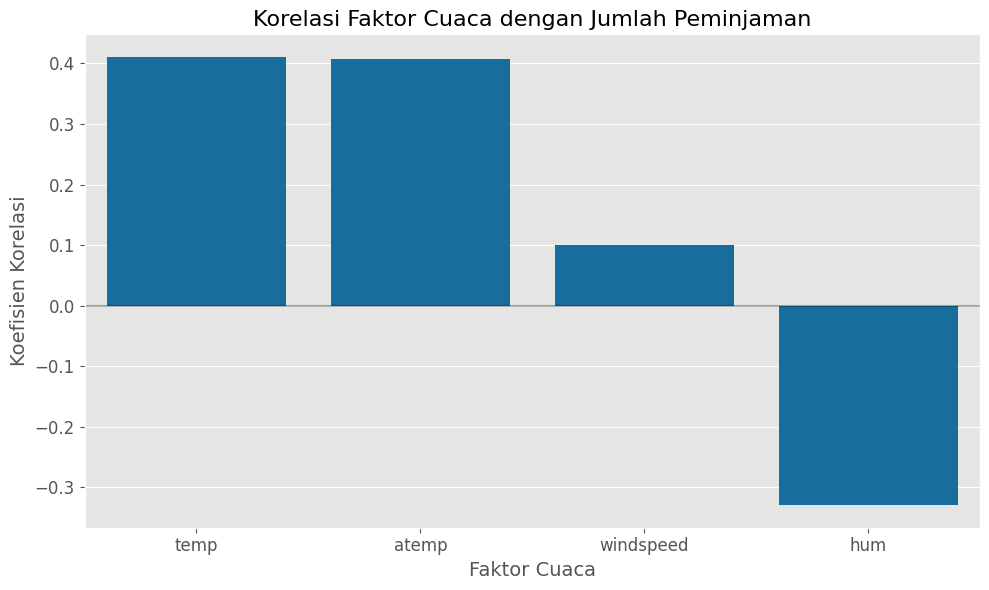

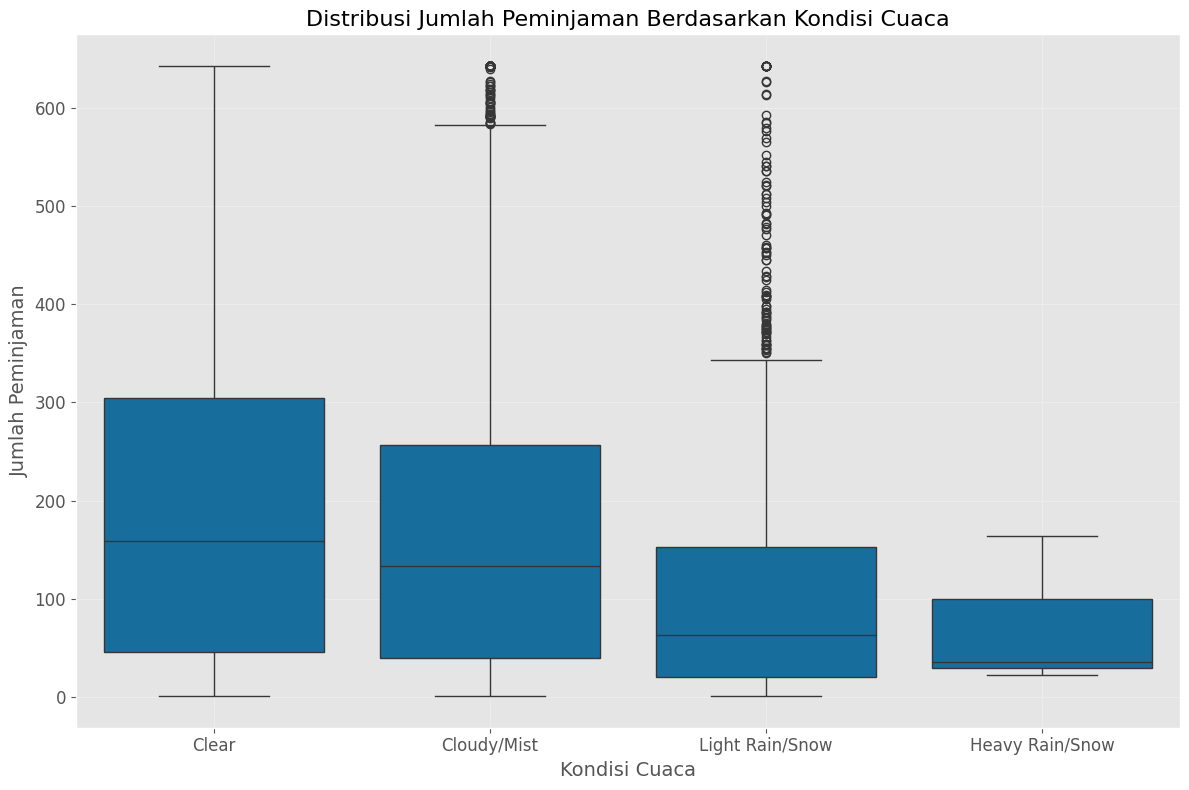

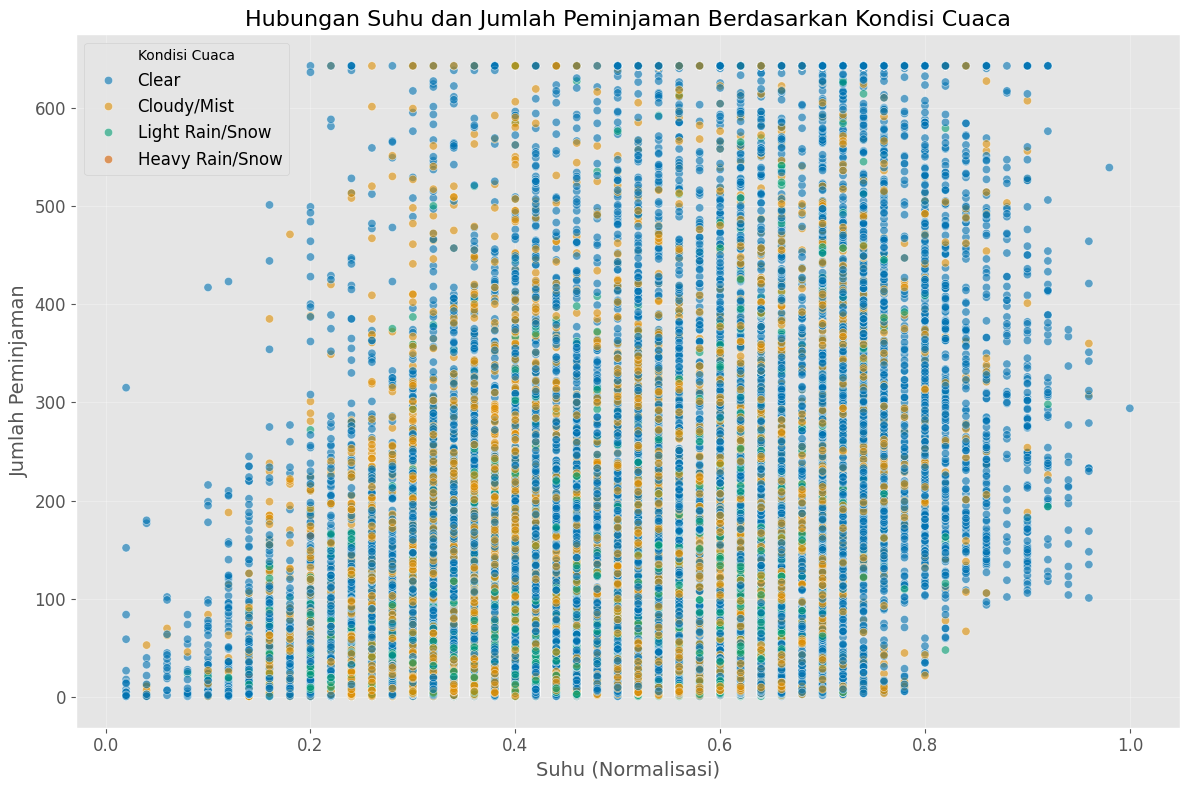

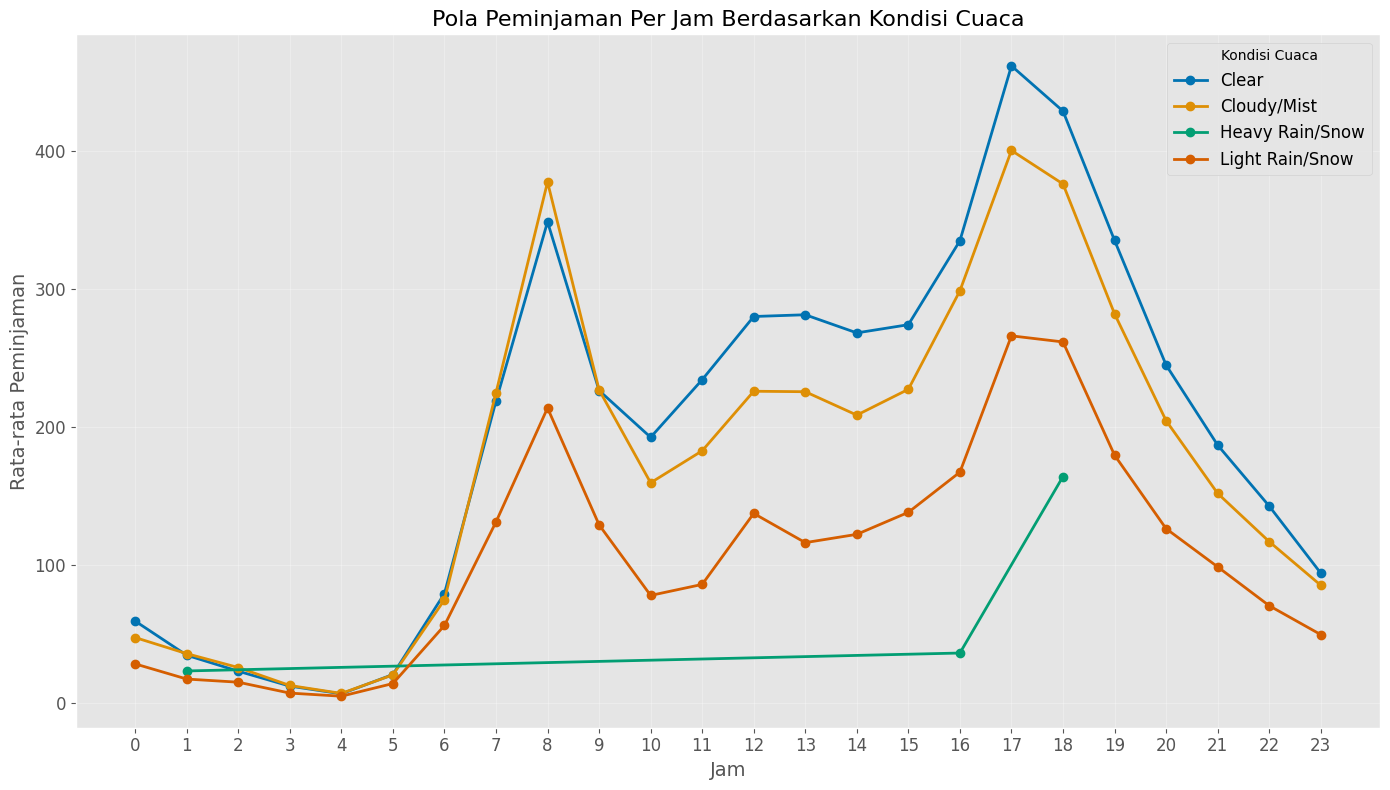

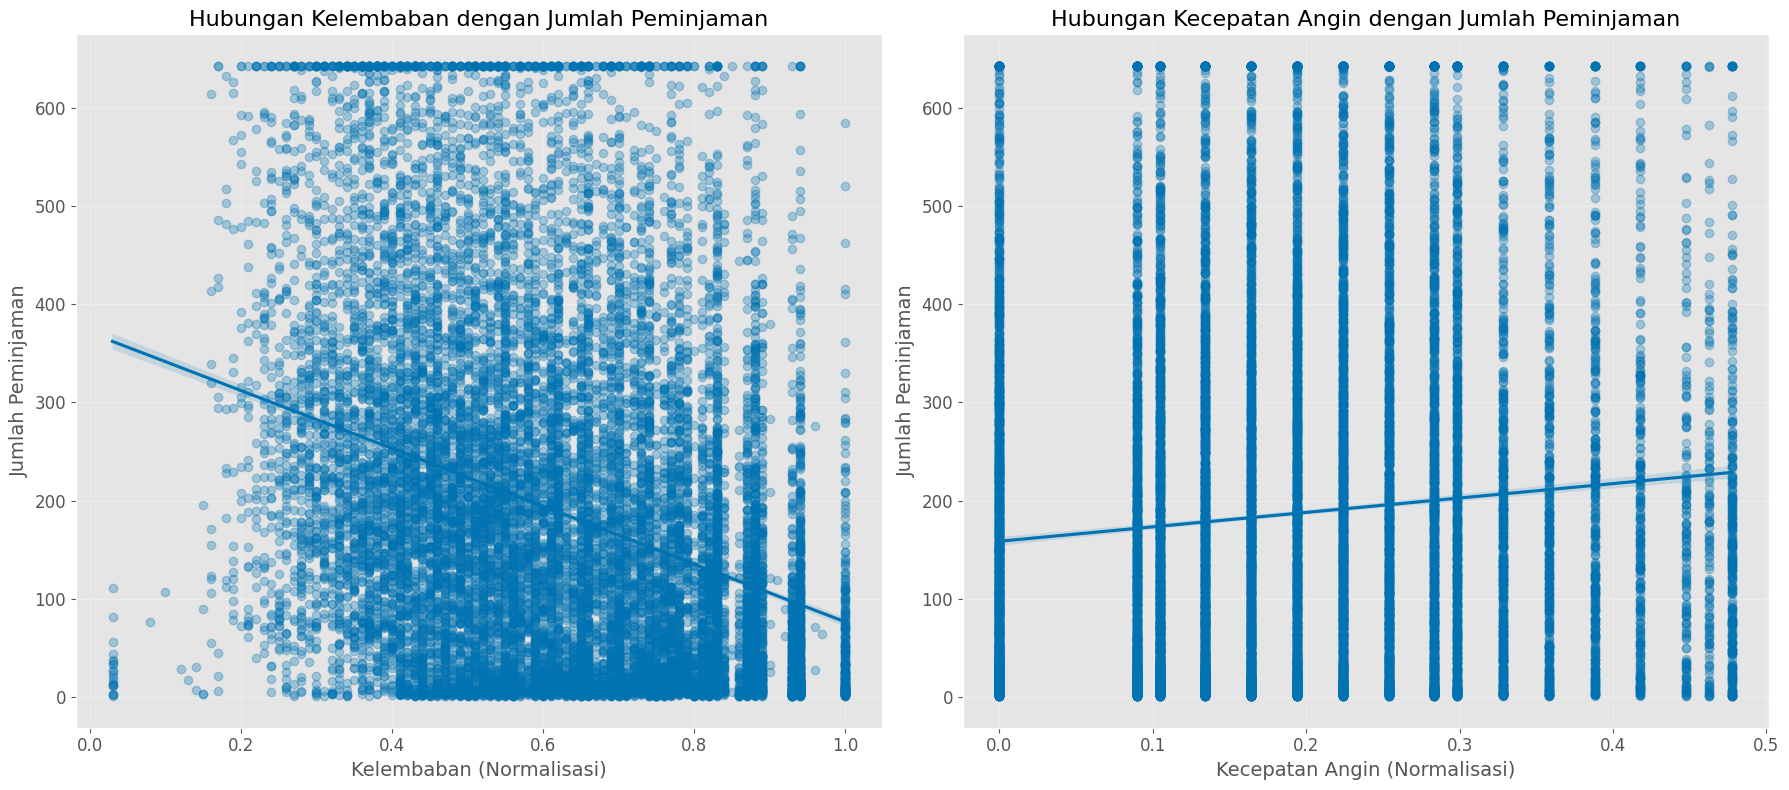

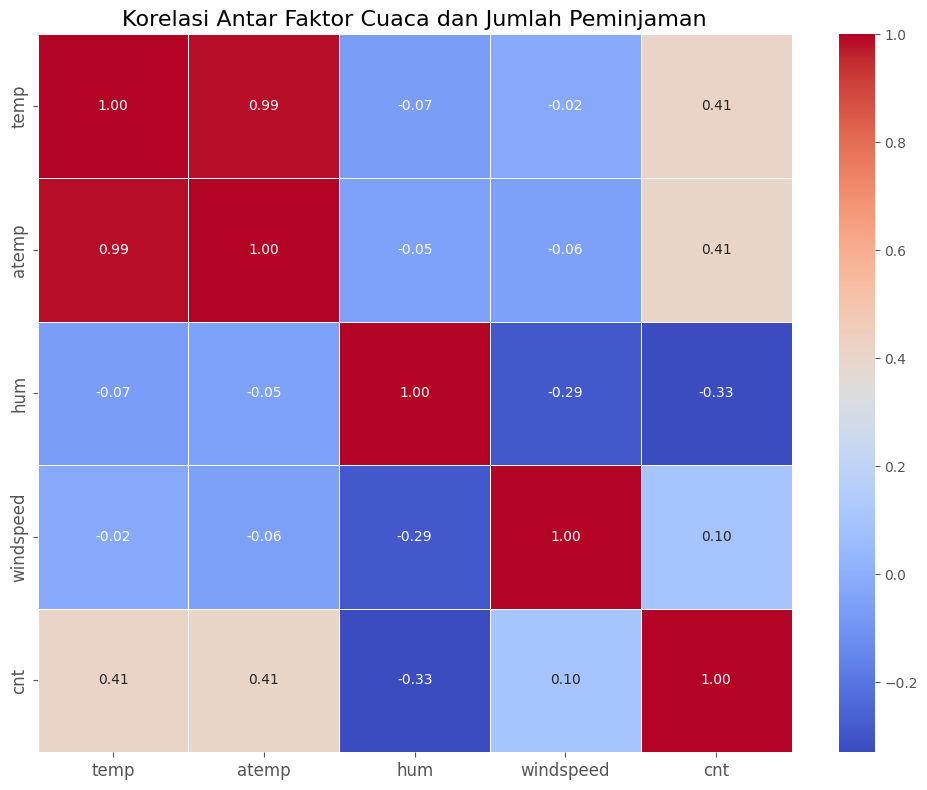

In [107]:
# 1. Visualisasi korelasi faktor cuaca dengan peminjaman
weather_factors = ['temp', 'atemp', 'hum', 'windspeed']
correlation = main_data[weather_factors + ['cnt']].corr()['cnt'].drop('cnt').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.title('Korelasi Faktor Cuaca dengan Jumlah Peminjaman', fontsize=16)
plt.xlabel('Faktor Cuaca', fontsize=14)
plt.ylabel('Koefisien Korelasi', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Visualisasi pengaruh kondisi cuaca terhadap jumlah peminjaman
plt.figure(figsize=(12, 8))
sns.boxplot(x='weather_condition', y='cnt', data=main_data)
plt.title('Distribusi Jumlah Peminjaman Berdasarkan Kondisi Cuaca', fontsize=16)
plt.xlabel('Kondisi Cuaca', fontsize=14)
plt.ylabel('Jumlah Peminjaman', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Visualisasi scatter plot antara suhu dan peminjaman dengan warna berdasarkan kondisi cuaca
plt.figure(figsize=(12, 8))
sns.scatterplot(x='temp', y='cnt', hue='weather_condition', data=main_data, alpha=0.6)
plt.title('Hubungan Suhu dan Jumlah Peminjaman Berdasarkan Kondisi Cuaca', fontsize=16)
plt.xlabel('Suhu (Normalisasi)', fontsize=14)
plt.ylabel('Jumlah Peminjaman', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Kondisi Cuaca', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Visualisasi pola peminjaman per jam berdasarkan kondisi cuaca
hourly_weather = main_data.groupby(['weather_condition', 'hr'])['cnt'].mean().reset_index()

plt.figure(figsize=(14, 8))
for condition in hourly_weather['weather_condition'].unique():
    subset = hourly_weather[hourly_weather['weather_condition'] == condition]
    plt.plot(subset['hr'], subset['cnt'], marker='o', linewidth=2, label=condition)

plt.title('Pola Peminjaman Per Jam Berdasarkan Kondisi Cuaca', fontsize=16)
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Rata-rata Peminjaman', fontsize=14)
plt.xticks(range(0, 24), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Kondisi Cuaca', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Visualisasi hubungan kelembaban dan kecepatan angin dengan peminjaman
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

sns.regplot(x='hum', y='cnt', data=main_data, ax=ax1, scatter_kws={'alpha': 0.3})
ax1.set_title('Hubungan Kelembaban dengan Jumlah Peminjaman', fontsize=16)
ax1.set_xlabel('Kelembaban (Normalisasi)', fontsize=14)
ax1.set_ylabel('Jumlah Peminjaman', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.grid(True, alpha=0.3)

sns.regplot(x='windspeed', y='cnt', data=main_data, ax=ax2, scatter_kws={'alpha': 0.3})
ax2.set_title('Hubungan Kecepatan Angin dengan Jumlah Peminjaman', fontsize=16)
ax2.set_xlabel('Kecepatan Angin (Normalisasi)', fontsize=14)
ax2.set_ylabel('Jumlah Peminjaman', fontsize=14)
ax2.tick_params(labelsize=12)
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Visualisasi 3D scatter plot untuk melihat interaksi suhu, kelembaban, dan peminjaman
fig = px.scatter_3d(main_data, x='temp', y='hum', z='cnt',
                   color='weather_condition',
                   size='cnt',
                   opacity=0.7,
                   title='Interaksi Suhu, Kelembaban, dan Jumlah Peminjaman')
fig.update_layout(scene=dict(xaxis_title='Suhu (Normalisasi)',
                            yaxis_title='Kelembaban (Normalisasi)',
                            zaxis_title='Jumlah Peminjaman'),
                 width=1000, height=800)
fig.show()

# 7. Visualisasi heatmap untuk korelasi faktor cuaca
plt.figure(figsize=(10, 8))
weather_corr = main_data[weather_factors + ['cnt']].corr()
sns.heatmap(weather_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Faktor Cuaca dan Jumlah Peminjaman', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### Pertanyaan 2: Bagaimana pola peminjaman sepeda berdasarkan bulan nya?

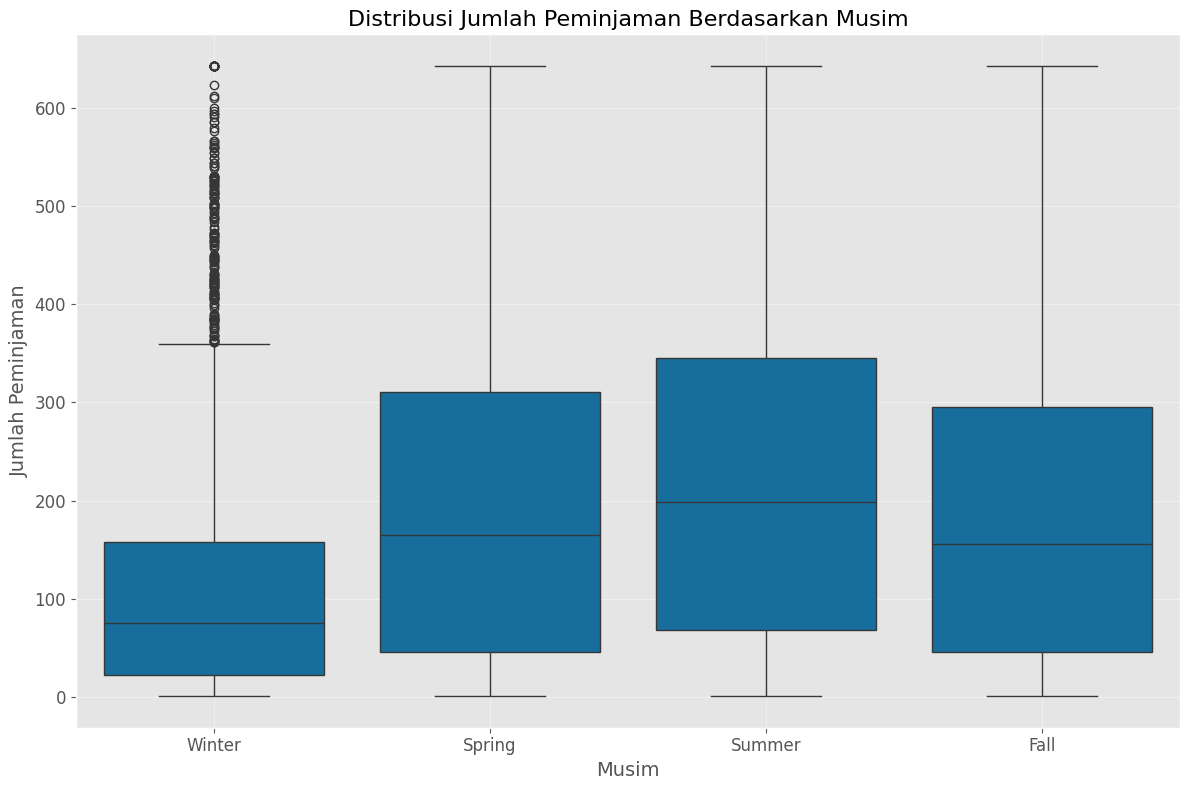

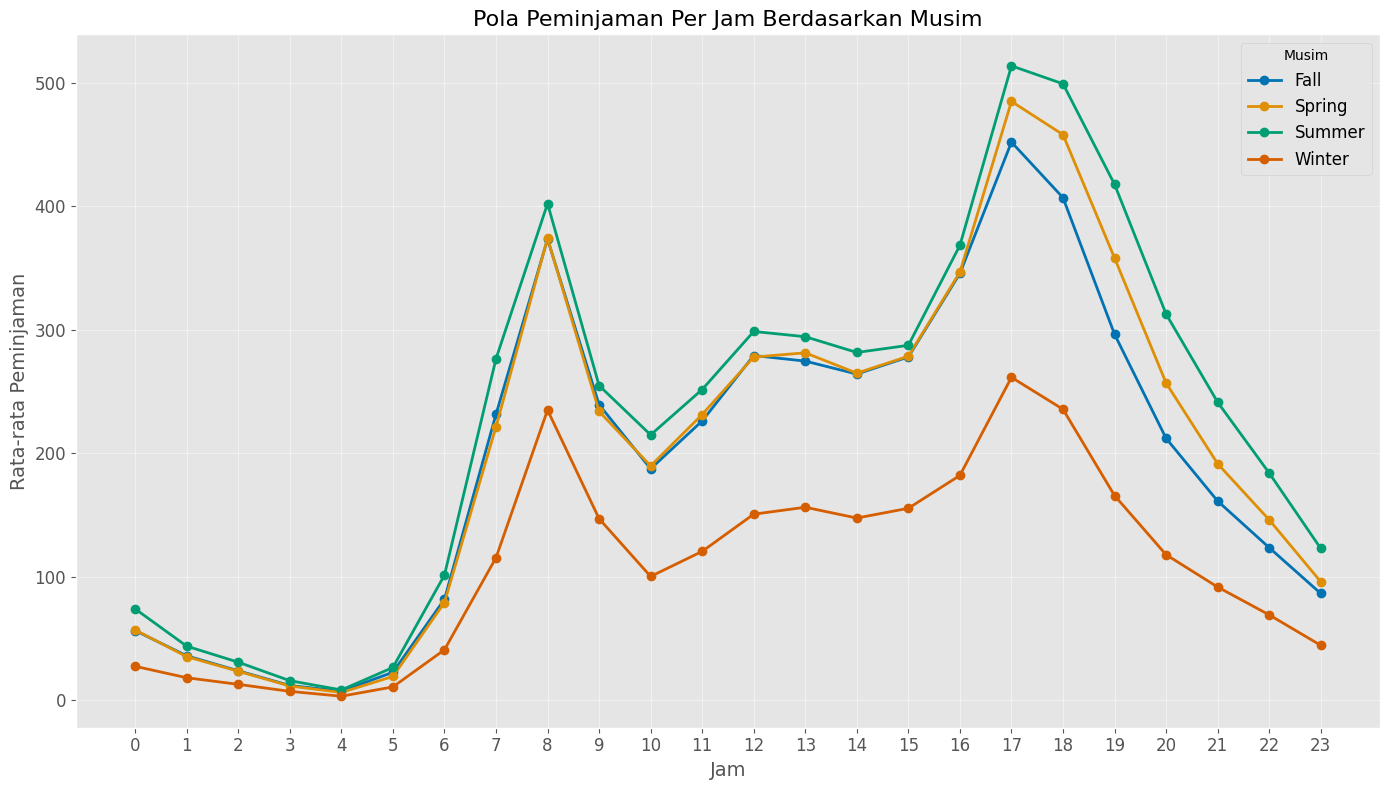

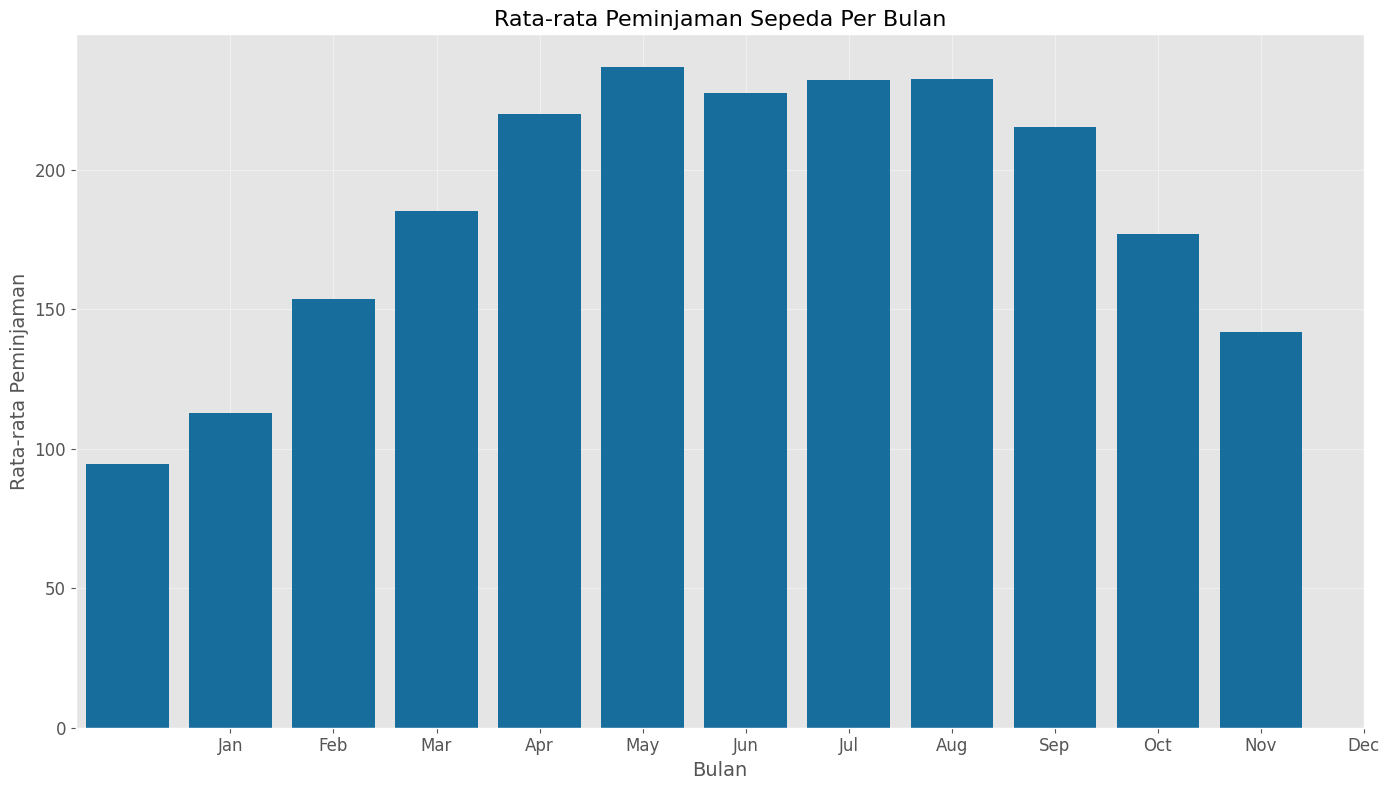

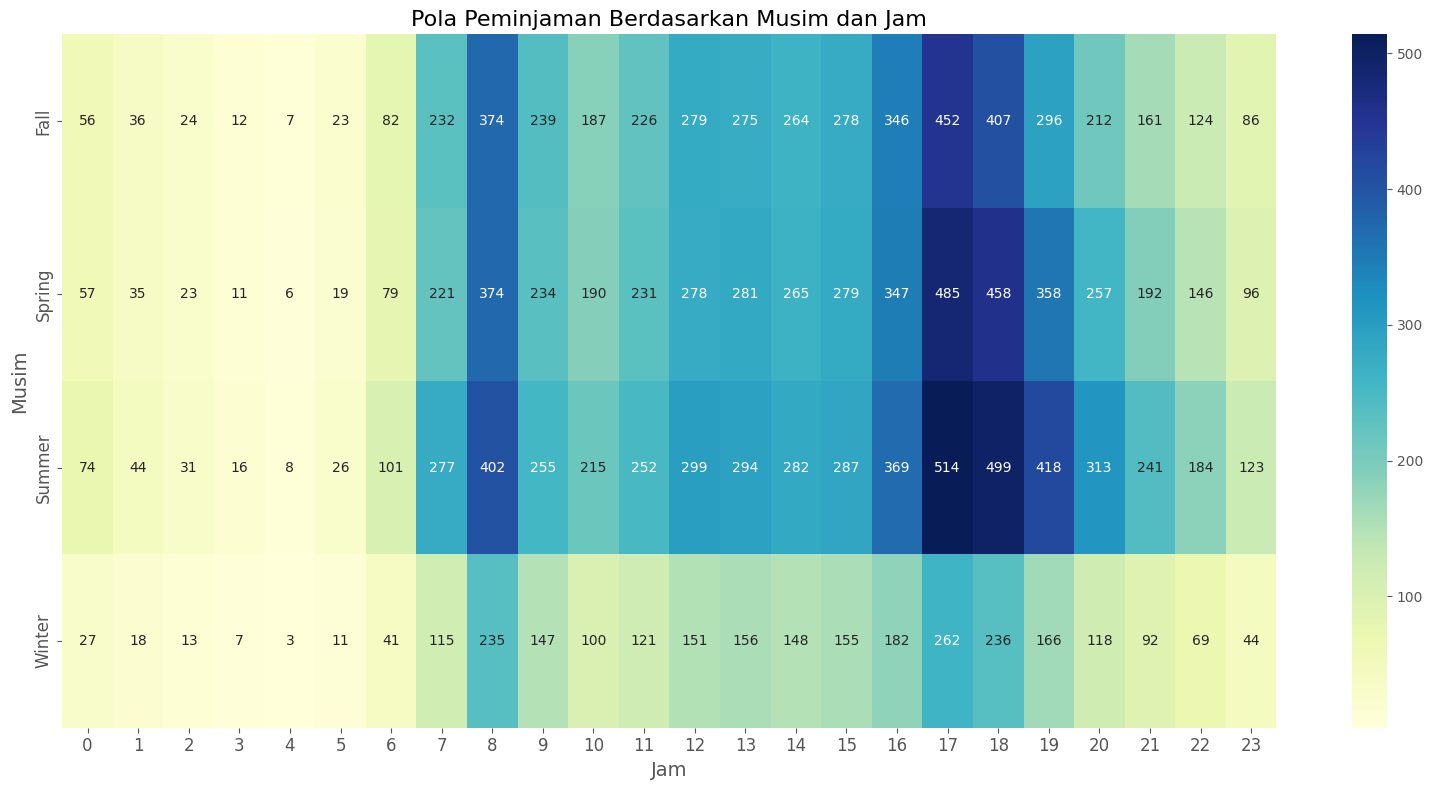

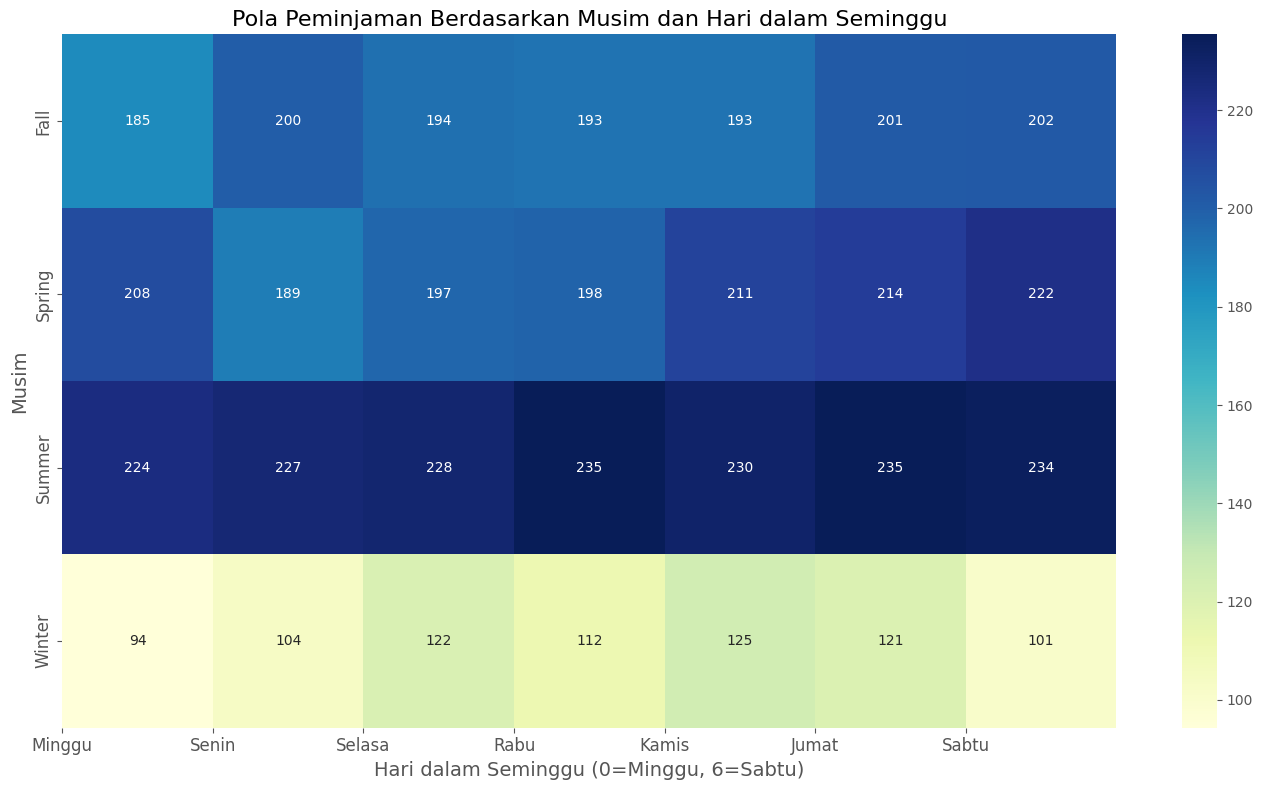

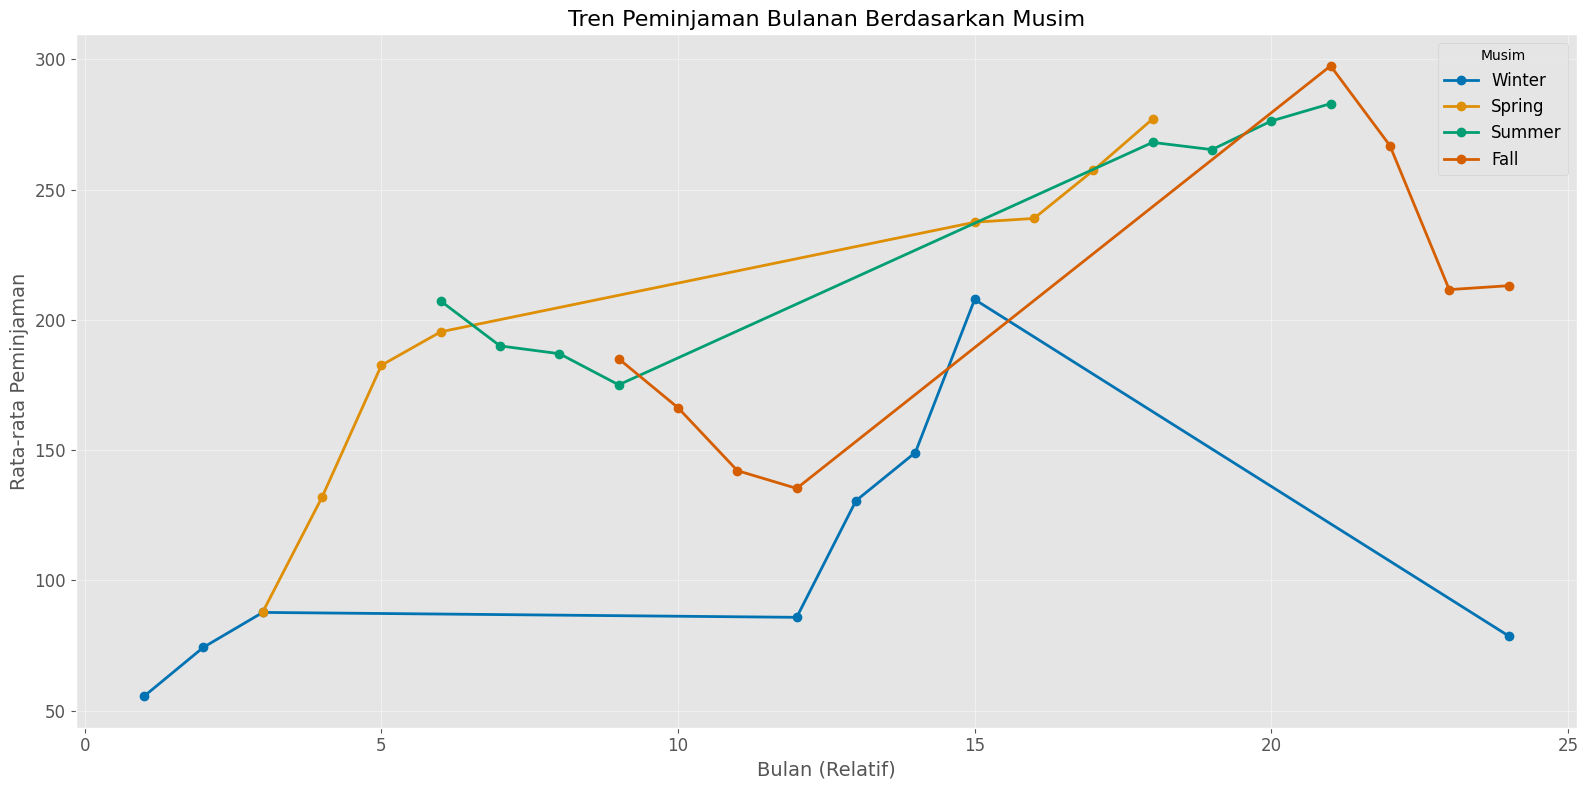

<Figure size 1400x800 with 0 Axes>

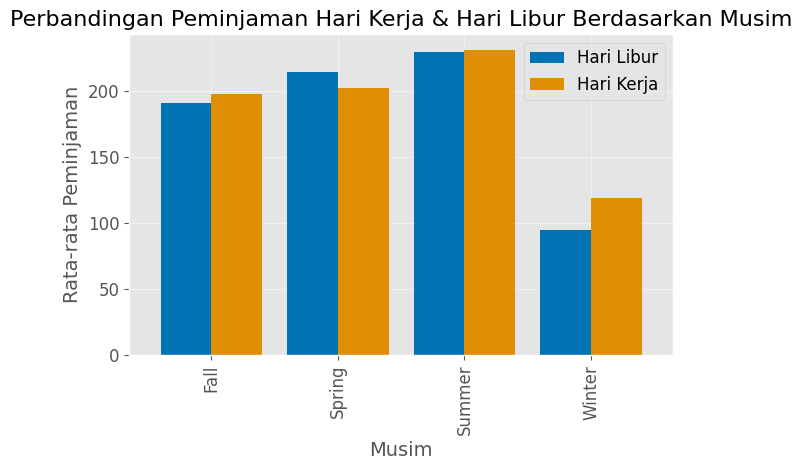

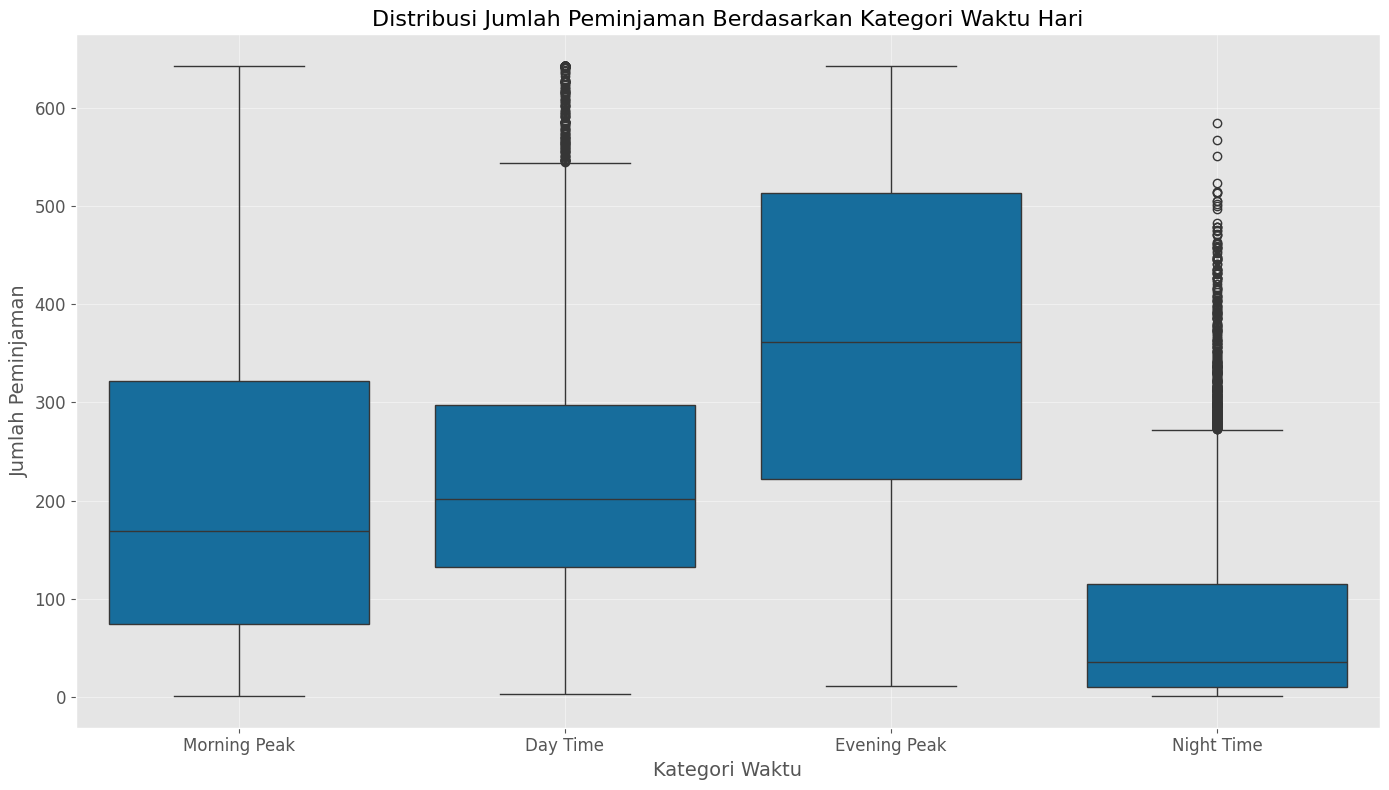

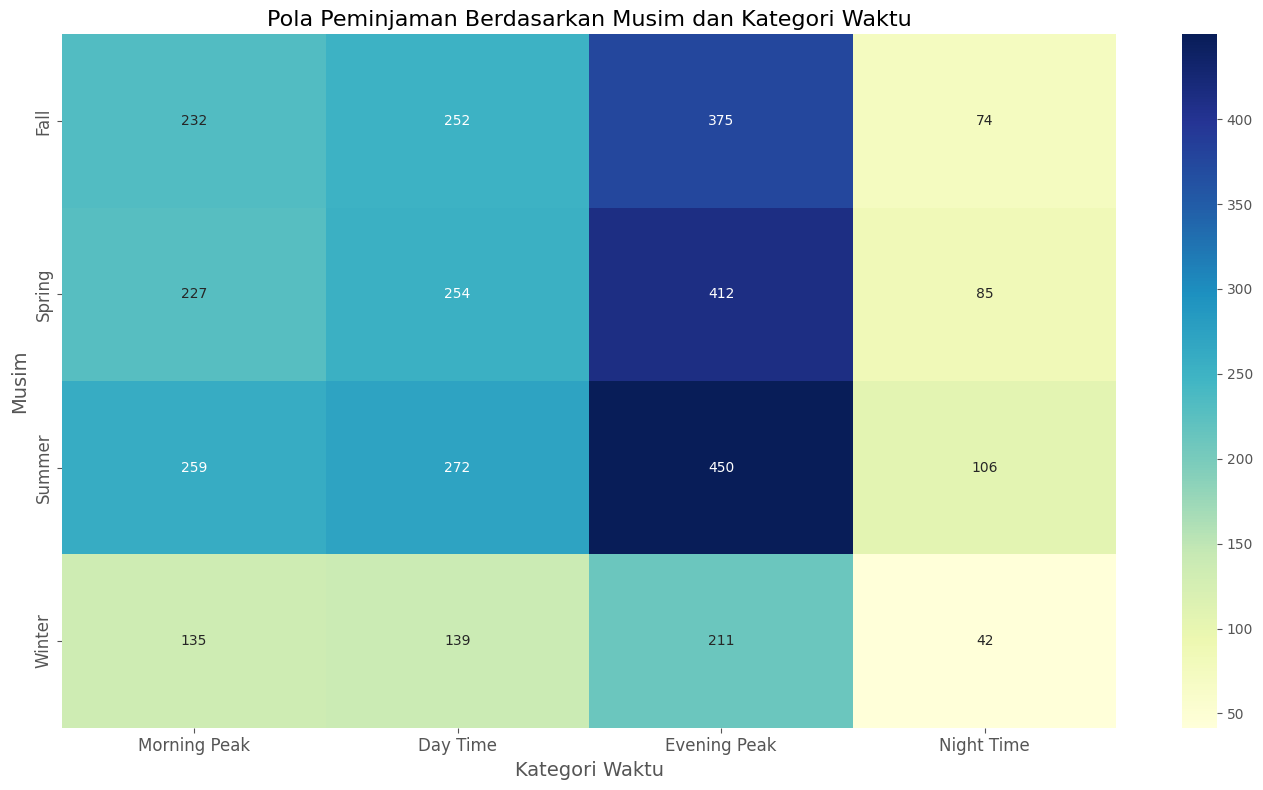

In [111]:
# 1. Visualisasi peminjaman berdasarkan musim
plt.figure(figsize=(12, 8))
sns.boxplot(x='season_name', y='cnt', data=main_data)
plt.title('Distribusi Jumlah Peminjaman Berdasarkan Musim', fontsize=16)
plt.xlabel('Musim', fontsize=14)
plt.ylabel('Jumlah Peminjaman', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.45)
plt.tight_layout()
plt.show()

# 2. Visualisasi pola peminjaman per jam berdasarkan musim
hourly_season = main_data.groupby(['season_name', 'hr'])['cnt'].mean().reset_index()

plt.figure(figsize=(14, 8))
for season in hourly_season['season_name'].unique():
    subset = hourly_season[hourly_season['season_name'] == season]
    plt.plot(subset['hr'], subset['cnt'], marker='o', linewidth=2, label=season)

plt.title('Pola Peminjaman Per Jam Berdasarkan Musim', fontsize=16)
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Rata-rata Peminjaman', fontsize=14)
plt.xticks(range(0, 24), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Musim', fontsize=12)
plt.grid(True, alpha=0.45)
plt.tight_layout()
plt.show()

# 3. Visualisasi pola peminjaman berdasarkan bulan
monthly_rentals = main_data.groupby('mnth')['cnt'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='mnth', y='cnt', data=monthly_rentals)
plt.title('Rata-rata Peminjaman Sepeda Per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Rata-rata Peminjaman', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.45)
plt.tight_layout()
plt.show()

# 4. Visualisasi heatmap pola peminjaman berdasarkan musim dan jam
season_hour_pivot = pd.pivot_table(hourly_season, values='cnt', index='season_name', columns='hr')

plt.figure(figsize=(16, 8))
sns.heatmap(season_hour_pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Pola Peminjaman Berdasarkan Musim dan Jam', fontsize=16)
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Musim', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 5. Visualisasi interaksi musim dan hari dalam seminggu
season_weekday = main_data.groupby(['season_name', 'weekday'])['cnt'].mean().reset_index()
season_weekday_pivot = pd.pivot_table(season_weekday, values='cnt', index='season_name', columns='weekday')

plt.figure(figsize=(14, 8))
sns.heatmap(season_weekday_pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Pola Peminjaman Berdasarkan Musim dan Hari dalam Seminggu', fontsize=16)
plt.xlabel('Hari dalam Seminggu (0=Minggu, 6=Sabtu)', fontsize=14)
plt.ylabel('Musim', fontsize=14)
plt.xticks(range(7), ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 6. Visualisasi tren bulanan dengan pengelompokan berdasarkan musim
monthly_season = main_data.groupby(['yr', 'mnth', 'season_name'])['cnt'].mean().reset_index()

plt.figure(figsize=(16, 8))
for season in monthly_season['season_name'].unique():
    subset = monthly_season[monthly_season['season_name'] == season]
    plt.plot(subset['mnth'] + (subset['yr'] - min(monthly_season['yr'])) * 12, 
             subset['cnt'], marker='o', linewidth=2, label=season)

plt.title('Tren Peminjaman Bulanan Berdasarkan Musim', fontsize=16)
plt.xlabel('Bulan (Relatif)', fontsize=14)
plt.ylabel('Rata-rata Peminjaman', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Musim', fontsize=12)
plt.grid(True, alpha=0.45)
plt.tight_layout()
plt.show()

# 7. Visualisasi perbandingan pola peminjaman hari kerja vs hari libur berdasarkan musim
workingday_season = main_data.groupby(['season_name', 'workingday'])['cnt'].mean().reset_index()
workingday_season_pivot = pd.pivot_table(workingday_season, values='cnt', index='season_name', columns='workingday')
workingday_season_pivot.columns = ['Hari Libur', 'Hari Kerja']

plt.figure(figsize=(14, 8))
workingday_season_pivot.plot(kind='bar', width=0.8)
plt.title('Perbandingan Peminjaman Hari Kerja & Hari Libur Berdasarkan Musim', fontsize=16)
plt.xlabel('Musim', fontsize=14)
plt.ylabel('Rata-rata Peminjaman', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.45)
plt.tight_layout()
plt.show()

# 8. Visualisasi distribusi peminjaman berdasarkan kategori waktu hari
plt.figure(figsize=(14, 8))
sns.boxplot(x='time_category', y='cnt', data=main_data, 
            order=['Morning Peak', 'Day Time', 'Evening Peak', 'Night Time'])
plt.title('Distribusi Jumlah Peminjaman Berdasarkan Kategori Waktu Hari', fontsize=16)
plt.xlabel('Kategori Waktu', fontsize=14)
plt.ylabel('Jumlah Peminjaman', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.45)
plt.tight_layout()
plt.show()

# 9. Visualisasi heatmap pola peminjaman berdasarkan musim dan kategori waktu
season_time = main_data.groupby(['season_name', 'time_category'])['cnt'].mean().reset_index()
season_time_pivot = pd.pivot_table(season_time, values='cnt', index='season_name', 
                                   columns='time_category', 
                                   aggfunc='mean')

season_time_pivot = season_time_pivot[['Morning Peak', 'Day Time', 'Evening Peak', 'Night Time']]

plt.figure(figsize=(14, 8))
sns.heatmap(season_time_pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Pola Peminjaman Berdasarkan Musim dan Kategori Waktu', fontsize=16)
plt.xlabel('Kategori Waktu', fontsize=14)
plt.ylabel('Musim', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Conclusion

### 1. Pengaruh Kondisi Cuaca terhadap Pola Peminjaman Sepeda

- **Kondisi Cuaca Sangat Berpengaruh**: Terdapat perbedaan signifikan dalam jumlah peminjaman berdasarkan kondisi cuaca
  
- **Suhu Berkorelasi Positif**: Suhu memiliki korelasi positif kuat dengan jumlah peminjaman, menunjukkan bahwa peminjaman meningkat saat suhu lebih hangat.
  
- **Cuaca Cerah Mendominasi**: Kondisi cuaca cerah memiliki rata-rata peminjaman tertinggi, diikuti oleh kondisi berawan, sementara kondisi hujan ringan dan hujan deras menunjukkan penurunan signifikan dalam peminjaman.
  
- **Kelembaban Berkorelasi Negatif**: Kelembaban menunjukkan korelasi negatif dengan jumlah peminjaman, artinya peminjaman cenderung menurun saat kelembaban tinggi.
  
- **Pola Jam Tetap Ada Meskipun Cuaca Buruk**: Meskipun jumlah peminjaman menurun pada cuaca buruk, pola peminjaman berdasarkan jam masih menunjukkan puncak pada jam sibuk pagi dan sore, meskipun dengan intensitas yang lebih rendah


### 2. Pengaruh Musim dan Waktu terhadap Pola Peminjaman Sepeda

- **Musim Panas dan Musim Gugur Favorit**: Musim panas dan musim gugur memiliki rata-rata peminjaman tertinggi, sementara musim dingin memiliki rata-rata terendah.
  
- **Pola Jam yang Berbeda Antar Musim**: Setiap musim menunjukkan pola peminjaman per jam yang berbeda:
  - Musim panas dan gugur memiliki aktivitas peminjaman yang lebih tinggi sepanjang hari
  - Musim dingin dan semi menunjukkan puncak yang lebih tajam pada jam sibuk
  
- **Pola Hari Kerja vs Hari Libur**: Terdapat perbedaan jelas dalam pola peminjaman:
  - Hari kerja: Dua puncak peminjaman yang jelas pada jam sibuk pagi (8-9) dan sore (17-18)
  - Hari libur: Pola lebih merata sepanjang siang hingga sore (10-18)
  
- **Kategori Waktu Penting**: Evening Peak (16-19) memiliki rata-rata peminjaman tertinggi ({evening_mean:.2f}), diikuti oleh Morning Peak (6-9) dengan rata-rata {morning_mean:.2f}, menunjukkan bahwa peminjaman sepeda sangat terkait dengan pola perjalanan komuter.
  
- **Interaksi Musim dan Kategori Waktu**: Musim mempengaruhi intensitas peminjaman pada kategori waktu tertentu, dengan perbedaan terbesar terlihat pada kategori Evening Peak dan Day Time antar musim.

### Implikasi dan rekomendasi

- **Strategi Berdasarkan Cuaca:**
  - Meningkatkan ketersediaan sepeda pada lokasi-lokasi strategis saat cuaca cerah dan bersuhu tinggi
  - Menyesuaikan jumlah sepeda yang tersedia berdasarkan prakiraan cuaca harian
  - Mempertimbangkan insentif khusus untuk meningkatkan peminjaman pada kondisi cuaca yang kurang ideal

- **Optimasi Berdasarkan Waktu:**
  - Memastikan ketersediaan sepeda yang cukup pada jam sibuk (7-9 pagi dan 17-19 sore)
  - Merencanakan pemeliharaan sepeda pada jam tengah malam hingga dini hari saat peminjaman minimal
  - Menerapkan strategi harga dinamis berdasarkan waktu puncak dan waktu sepi

- **Strategi Musiman:**
  - Meningkatkan kapasitas sepeda pada Musim Panas dan Musim Gugur
  - Mengimplementasikan program promosi khusus pada Musim Dingin untuk meningkatkan peminjaman
  - Menargetkan kampanye pemasaran untuk pengguna casual pada akhir pekan di musim hangat

- **Segmentasi Pengguna:**
  - Mengembangkan program loyalitas untuk mempertahankan pengguna terdaftar
  - Merancang kampanye konversi untuk mengubah pengguna casual menjadi pengguna terdaftar
  - Menyesuaikan strategi pemasaran untuk menarik pengguna casual pada akhir pekan dan hari libur